In [1]:
# Importing required libraries

import pandas as pd
import numpy as np

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Connect to the dataset and import to jupyter file
df= pd.read_csv('train.csv')

In [3]:
# Top 5 records
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [4]:
df.tail(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[5 rows x 81 columns]

In [5]:
print( 'Dataset have \n',df.shape[0] ,'Rows','\n and\n',df.shape[1],' Columns')

Dataset have 
 1168 Rows 
 and
 81  Columns


In [6]:
#Missing Values

In [7]:
pd.set_option('display.max_rows',None)
(df.isnull().sum()/df.shape[0])*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      18.321918
LotArea           0.000000
Street            0.000000
Alley            93.407534
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.599315
MasVnrArea        0.599315
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.568493
BsmtCond          2.568493
BsmtExposure      2.654110
BsmtFinType1      2.568493
BsmtFinSF1        0.000000
BsmtFinType2      2.654110
BsmtFinSF2        0.000000
B

<AxesSubplot:>

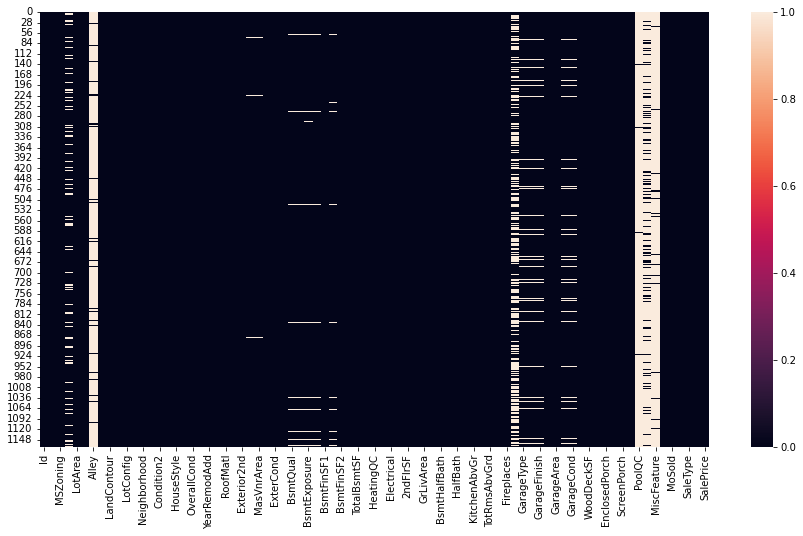

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())

In [9]:
# Few features have more than 90% records missing. It would not be good to fill them, better to delete them as they will not provide
# any useful insight for the prediction
# Delete features which have more missing values

df=df.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'], axis=1)

In [10]:
df.shape

(1168, 76)

In [11]:
pd.set_option('display.max_rows',None)
(df.isnull().sum()/df.shape[0])*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      18.321918
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.599315
MasVnrArea        0.599315
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.568493
BsmtCond          2.568493
BsmtExposure      2.654110
BsmtFinType1      2.568493
BsmtFinSF1        0.000000
BsmtFinType2      2.654110
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [12]:
pd.set_option('display.max_columns',None)
df.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  127         120       RL          NaN     4928   Pave      IR1         Lvl   
1  889          20       RL         95.0    15865   Pave      IR1         Lvl   
2  793          60       RL         92.0     9920   Pave      IR1         Lvl   
3  110          20       RL        105.0    11751   Pave      IR1         Lvl   
4  422          20       RL          NaN    16635   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE   
1    AllPub    Inside       Mod        NAmes       Norm       Norm     1Fam   
2    AllPub   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
3    AllPub    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl       NWAmes       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     1Story            6            5       1976          1976     Gable   
1     1Story            8            6       1970          1970      Flat   
2     2Story            7            5       1996          1997     Gable   
3     1Story            6            6       1977          1977       Hip   
4     1Story            6            7       1977          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     Plywood     Plywood       None         0.0        TA        TA   
1  Tar&Grv     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd   
2  CompShg     MetalSd     MetalSd       None         0.0        Gd        TA   
3  CompShg     Plywood     Plywood    BrkFace       480.0        TA        TA   
4  CompShg     CemntBd     CmentBd      Stone       126.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       Gd       TA           No          ALQ         120   
1      PConc       TA       Gd           Gd          ALQ         351   
2      PConc       Gd       TA           Av          GLQ         862   
3     CBlock       Gd       TA           No          BLQ         705   
4     CBlock       Gd       TA           No          ALQ        1246   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        958         1078    GasA        TA   
1          Rec         823       1043         2217    GasA        Ex   
2          Unf           0        255         1117    GasA        Ex   
3          Unf           0       1139         1844    GasA        Ex   
4          Unf           0        356         1602    GasA        Gd   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       958         0             0        958   
1          Y      SBrkr      2217         0             0       2217   
2          Y      SBrkr      1127       886             0       2013   
3          Y      SBrkr      1844         0             0       1844   
4          Y      SBrkr      1602         0             0       1602   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             1         2         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          TA             5        Typ           1     Attchd       1977.0   
1          Gd             8        Typ           1     Attchd       1970.0   
2          TA             8        Typ           1     Attchd       1997

In [13]:
# Find unique values in each feature

for i in df.columns:
    print(df[i].nunique(), i)

1168 Id
15 MSSubClass
5 MSZoning
106 LotFrontage
892 LotArea
2 Street
4 LotShape
4 LandContour
1 Utilities
5 LotConfig
3 LandSlope
25 Neighborhood
9 Condition1
8 Condition2
5 BldgType
8 HouseStyle
10 OverallQual
9 OverallCond
110 YearBuilt
61 YearRemodAdd
6 RoofStyle
8 RoofMatl
14 Exterior1st
15 Exterior2nd
4 MasVnrType
283 MasVnrArea
4 ExterQual
5 ExterCond
6 Foundation
4 BsmtQual
4 BsmtCond
4 BsmtExposure
6 BsmtFinType1
551 BsmtFinSF1
6 BsmtFinType2
122 BsmtFinSF2
681 BsmtUnfSF
636 TotalBsmtSF
6 Heating
5 HeatingQC
2 CentralAir
5 Electrical
669 1stFlrSF
351 2ndFlrSF
21 LowQualFinSF
746 GrLivArea
4 BsmtFullBath
3 BsmtHalfBath
4 FullBath
3 HalfBath
8 BedroomAbvGr
4 KitchenAbvGr
4 KitchenQual
12 TotRmsAbvGrd
7 Functional
4 Fireplaces
6 GarageType
97 GarageYrBlt
3 GarageFinish
5 GarageCars
392 GarageArea
5 GarageQual
5 GarageCond
3 PavedDrive
244 WoodDeckSF
176 OpenPorchSF
106 EnclosedPorch
18 3SsnPorch
65 ScreenPorch
8 PoolArea
20 MiscVal
12 MoSold
5 YrSold
9 SaleType
6 SaleCondition
58

In [14]:
df['Id'].nunique()

1168

In [15]:
df['Utilities'].unique()

array(['AllPub'], dtype=object)

In [16]:
df=df.drop(['Id','Utilities'], axis=1)
df.shape

(1168, 74)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    954 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   LotConfig      1168 non-null   object 
 8   LandSlope      1168 non-null   object 
 9   Neighborhood   1168 non-null   object 
 10  Condition1     1168 non-null   object 
 11  Condition2     1168 non-null   object 
 12  BldgType       1168 non-null   object 
 13  HouseStyle     1168 non-null   object 
 14  OverallQual    1168 non-null   int64  
 15  OverallCond    1168 non-null   int64  
 16  YearBuilt      1168 non-null   int64  
 17  YearRemodAdd   1168 non-null   int64  
 18  RoofStyl

In [18]:
# we have int, object (categorical) and float type datatypes features 
# Statistical Summary

df.describe().T

count           mean           std      min        25%  \
MSSubClass     1168.0      56.767979     41.940650     20.0      20.00   
LotFrontage     954.0      70.988470     24.828750     21.0      60.00   
LotArea        1168.0   10484.749144   8957.442311   1300.0    7621.50   
OverallQual    1168.0       6.104452      1.390153      1.0       5.00   
OverallCond    1168.0       5.595890      1.124343      1.0       5.00   
YearBuilt      1168.0    1970.930651     30.145255   1875.0    1954.00   
YearRemodAdd   1168.0    1984.758562     20.785185   1950.0    1966.00   
MasVnrArea     1161.0     102.310078    182.595606      0.0       0.00   
BsmtFinSF1     1168.0     444.726027    462.664785      0.0       0.00   
BsmtFinSF2     1168.0      46.647260    163.520016      0.0       0.00   
BsmtUnfSF      1168.0     569.721747    449.375525      0.0     216.00   
TotalBsmtSF    1168.0    1061.095034    442.272249      0.0     799.00   
1stFlrSF       1168.0    1169.860445    391.161983    334.0     892.00   
2ndFlrSF       1168.0     348.826199    439.696370      0.0       0.00   
LowQualFinSF   1168.0       6.380137     50.892844      0.0       0.00   
GrLivArea      1168.0    1525.066781    528.042957    334.0    1143.25   
BsmtFullBath   1168.0       0.425514      0.521615      0.0       0.00   
BsmtHalfBath   1168.0       0.055651      0.236699      0.0       0.00   
FullBath       1168.0       1.562500      0.551882      0.0       1.00   
HalfBath       1168.0       0.388699      0.504929      0.0       0.00   
BedroomAbvGr   1168.0       2.884418      0.817229      0.0       2.00   
KitchenAbvGr   1168.0       1.045377      0.216292      0.0       1.00   
TotRmsAbvGrd   1168.0       6.542808      1.598484      2.0       5.00   
Fireplaces     1168.0       0.617295      0.650575      0.0       0.00   
GarageYrBlt    1104.0    1978.193841     24.890704   1900.0    1961.00   
GarageCars     1168.0       1.776541      0.745554      0.0       1.00   
GarageArea     1168.0     476.860445    214.466769      0.0     338.00   
WoodDeckSF     1168.0      96.206336    126.158988      0.0       0.00   
OpenPorchSF    1168.0      46.559932     66.381023      0.0       0.00   
EnclosedPorch  1168.0      23.015411     63.191089      0.0       0.00   
3SsnPorch      1168.0       3.639555     29.088867      0.0       0.00   
ScreenPorch    1168.0      15.051370     55.080816      0.0       0.00   
PoolArea       1168.0       3.448630     44.896939      0.0       0.00   
MiscVal        1168.0      47.315068    543.264432      0.0       0.00   
MoSold         1168.0       6.344178      2.686352      1.0       5.00   
YrSold         1168.0    2007.804795      1.329738   2006.0    2007.00   
SalePrice      1168.0  181477.005993  79105.586863  34900.0  130375.00   

                    50%       75%       max  
MSSubClass         50.0      70.0     190.0  
LotFrontage        70.0      80.0     313.0  
LotArea          9522.5   11515.5  164660.0  
OverallQual         6.0       7.0      10.0  
OverallCond         5.0       6.0       9.0  
YearBuilt        1972.0    2000.0    2010.0  
YearRemodAdd     1993.0    2004.0    2010.0  
MasVnrArea          0.0     160.0    1600.0  
BsmtFinSF1        385.5     714.5    5644.0  
BsmtFinSF2          0.0       0.0    1474.0  
BsmtUnfSF         474.0     816.0    2336.0  
TotalBsmtSF      1005.5    1291.5    6110.0  
1stFlrSF         1096.5    1392.0    4692.0  
2ndFlrSF            0.0     729.0    2065.0  
LowQualFinSF        0.0       0.0     572.0  
GrLivArea        1468.5    1795.0    5642.0  
BsmtFullBath        0.0       1.0       3.0  
BsmtHalfBath        0.0       0.0       2.0  
FullBath            2.0       2.0       3.0  
HalfBath            0.0       1.0       2.0  
BedroomAbvGr        3.0       3.0       8.0  
KitchenAbvGr        1.0       1.0       3.0  
TotRmsAbvGrd        6.0       7.0      14.0  
Fireplaces          1.0       1.0       3.0  
GarageYrBlt      1980.0    2002.0    2010.0  
GarageC

In [19]:
# many features are in integer datatype but having categorical information
df.head(5)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL          NaN     4928   Pave      IR1         Lvl   
1          20       RL         95.0    15865   Pave      IR1         Lvl   
2          60       RL         92.0     9920   Pave      IR1         Lvl   
3          20       RL        105.0    11751   Pave      IR1         Lvl   
4          20       RL          NaN    16635   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE     1Story   
1    Inside       Mod        NAmes       Norm       Norm     1Fam     1Story   
2   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam     2Story   
3    Inside       Gtl       NWAmes       Norm       Norm     1Fam     1Story   
4       FR2       Gtl       NWAmes       Norm       Norm     1Fam     1Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            6            5       1976          1976     Gable  CompShg   
1            8            6       1970          1970      Flat  Tar&Grv   
2            7            5       1996          1997     Gable  CompShg   
3            6            6       1977          1977       Hip  CompShg   
4            6            7       1977          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     Plywood     Plywood       None         0.0        TA        TA   
1     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd   
2     MetalSd     MetalSd       None         0.0        Gd        TA   
3     Plywood     Plywood    BrkFace       480.0        TA        TA   
4     CemntBd     CmentBd      Stone       126.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       Gd       TA           No          ALQ         120   
1      PConc       TA       Gd           Gd          ALQ         351   
2      PConc       Gd       TA           Av          GLQ         862   
3     CBlock       Gd       TA           No          BLQ         705   
4     CBlock       Gd       TA           No          ALQ        1246   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        958         1078    GasA        TA   
1          Rec         823       1043         2217    GasA        Ex   
2          Unf           0        255         1117    GasA        Ex   
3          Unf           0       1139         1844    GasA        Ex   
4          Unf           0        356         1602    GasA        Gd   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       958         0             0        958   
1          Y      SBrkr      2217         0             0       2217   
2          Y      SBrkr      1127       886             0       2013   
3          Y      SBrkr      1844         0             0       1844   
4          Y      SBrkr      1602         0             0       1602   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             1         2         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          TA             5        Typ           1     Attchd       1977.0   
1          Gd             8        Typ           1     Attchd       1970.0   
2          TA             8        Typ           1     Attchd       1997.0   
3          TA             7        Typ           1     Attchd       1977.0   
4    

In [20]:
#Visualization
##Target feature

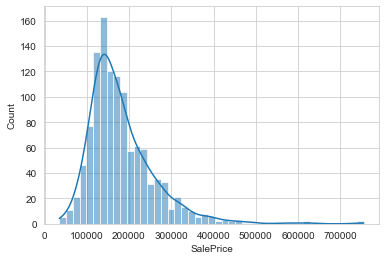

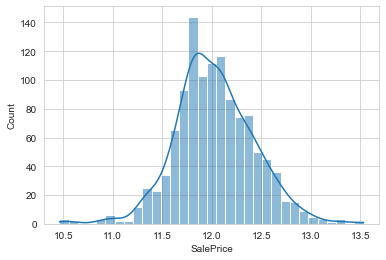

In [21]:
sns.set_style('whitegrid')

sns.histplot(df['SalePrice'], kde=True)
plt.show()


sns.histplot(np.log(df['SalePrice']), kde=True)
plt.show()

<AxesSubplot:>

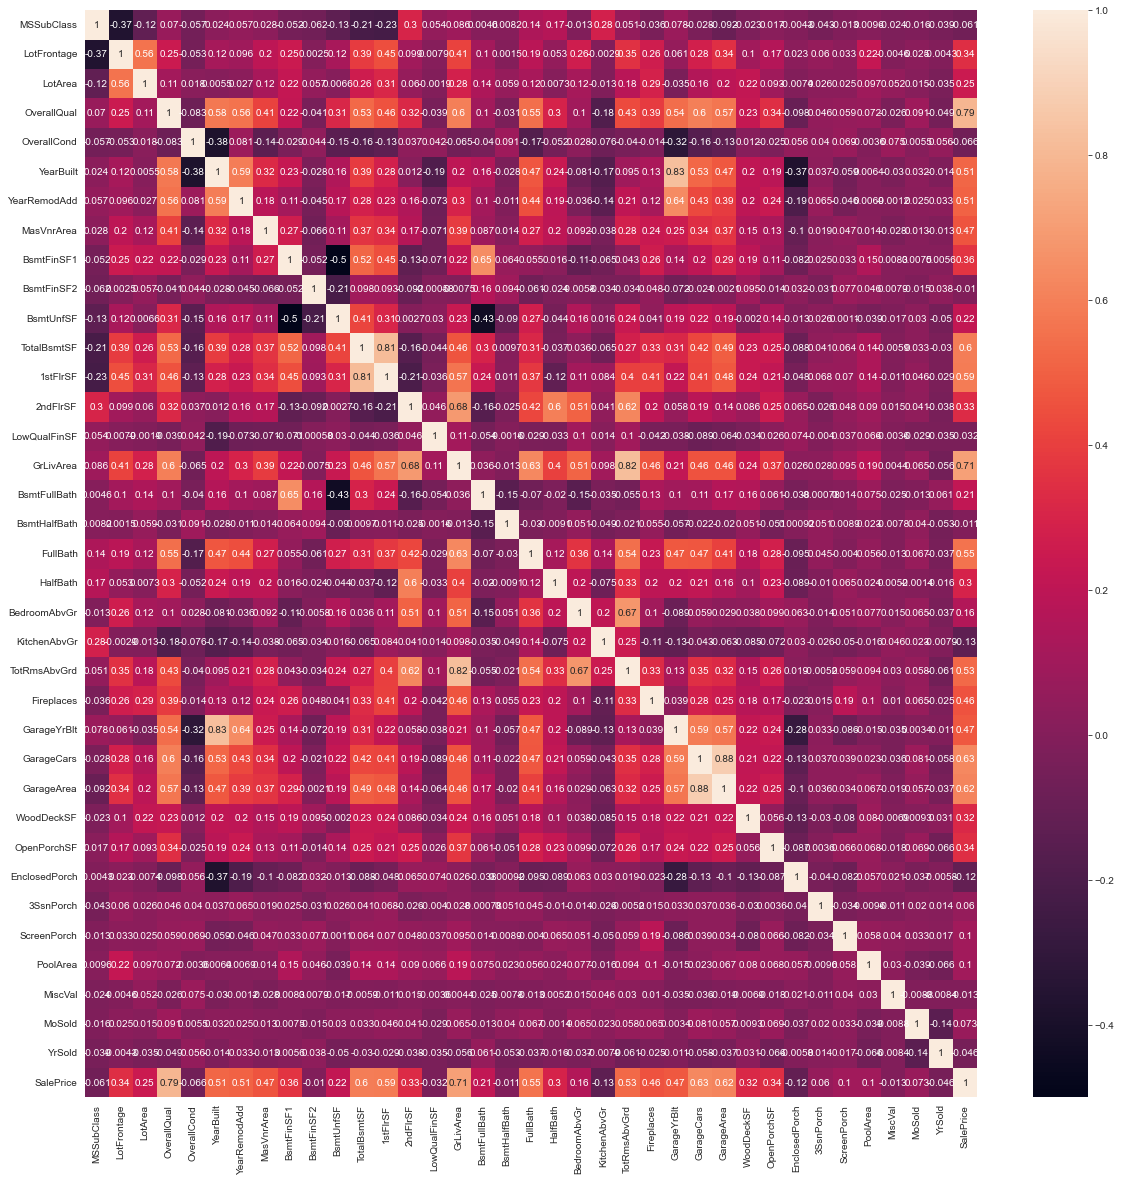

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [23]:
# few features are strongly correlated with target feature
# Although, few independent features are good correlated with each other
df.head(2)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL          NaN     4928   Pave      IR1         Lvl   
1          20       RL         95.0    15865   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE     1Story   
1    Inside       Mod        NAmes       Norm       Norm     1Fam     1Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            6            5       1976          1976     Gable  CompShg   
1            8            6       1970          1970      Flat  Tar&Grv   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     Plywood     Plywood       None         0.0        TA        TA   
1     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       Gd       TA           No          ALQ         120   
1      PConc       TA       Gd           Gd          ALQ         351   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        958         1078    GasA        TA   
1          Rec         823       1043         2217    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       958         0             0        958   
1          Y      SBrkr      2217         0             0       2217   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          TA             5        Typ           1     Attchd       1977.0   
1          Gd             8        Typ           1     Attchd       1970.0   

  GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
0          RFn           2         440         TA         TA          Y   
1          Unf           2         621         TA         TA          Y   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0          205              0          0            0         0   
1          81          207              0          0          224         0   

   MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
0        0       2    2007       WD        Normal     128000  
1        0      10    2007       WD        Normal     268000

In [24]:
df['MSSubClass'].isnull().sum()

0

In [25]:
df['MSSubClass'].nunique()

15

<AxesSubplot:xlabel='MSSubClass', ylabel='count'>

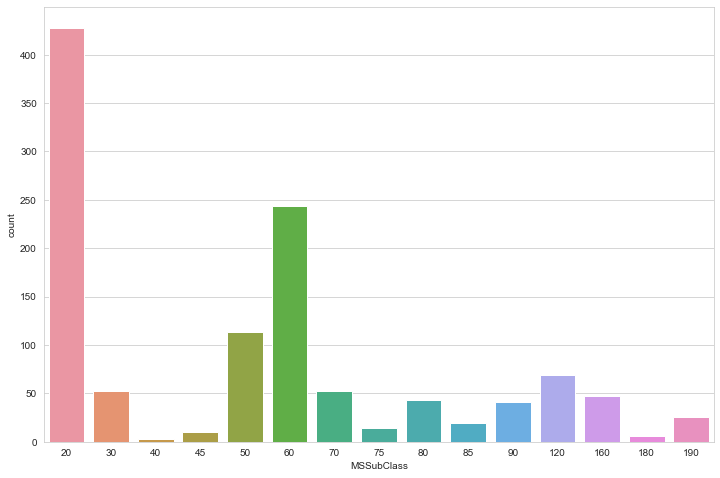

In [26]:
plt.figure(figsize=(12,8))
sns.countplot(df['MSSubClass'])

In [27]:
#MSZoning
df['MSZoning'].isnull().sum()

0

In [28]:
df['MSZoning'].unique()

array(['RL', 'RM', 'FV', 'RH', 'C (all)'], dtype=object)

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

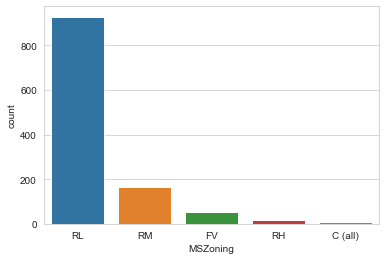

In [29]:
# this is categorical feature, nominal
sns.countplot(df['MSZoning'])

In [30]:
# Residential Low Density Zone house more in this dataset.
df.groupby('MSZoning')['SalePrice'].mean().sort_values(ascending=False)

MSZoning
FV         209478.461538
RL         191004.181034
RH         131558.375000
RM         129070.975460
C (all)     75208.888889
Name: SalePrice, dtype: float64

In [31]:
#LotFrontage
def feature_details(i):
    print(i,' has total unique values = ',df[i].nunique() ,'out of ',df.shape[0])
    if df[i].nunique() <10:
        print(df[i].unique())
    print('Feature datatype is = ',df[i].dtypes)
    print('Feature has ',(df[i].isnull().sum()/df.shape[0])*100,'%  missing values')
    
    if df[i].dtypes =='O':
        sns.countplot(df[i])
        plt.show()
        print(df.groupby(i)['SalePrice'].mean().sort_values(ascending=False))
    elif df[i].dtypes !='O':
        sns.scatterplot(df[i],df['SalePrice'])
        plt.show()
        

LotFrontage  has total unique values =  106 out of  1168
Feature datatype is =  float64
Feature has  18.32191780821918 %  missing values


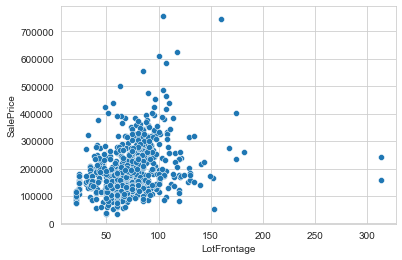

In [32]:
feature_details('LotFrontage')

In [33]:
df['LotFrontage'].isnull().sum()/df.shape[0]

0.1832191780821918

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

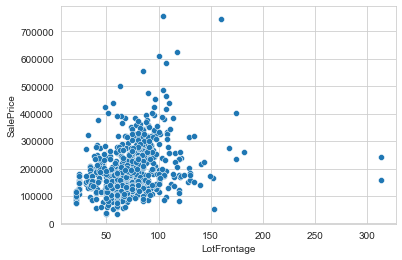

In [34]:
sns.scatterplot(df['LotFrontage'],df['SalePrice'])

LotArea  has total unique values =  892 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


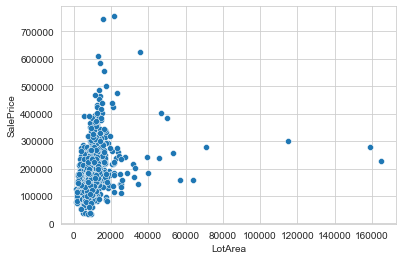

In [36]:
#LotArea
feature_details('LotArea')

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

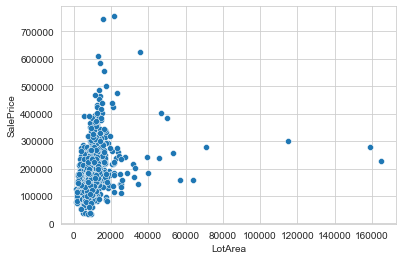

In [37]:
sns.scatterplot(df['LotArea'],df['SalePrice'])

Street  has total unique values =  2 out of  1168
['Pave' 'Grvl']
Feature datatype is =  object
Feature has  0.0 %  missing values


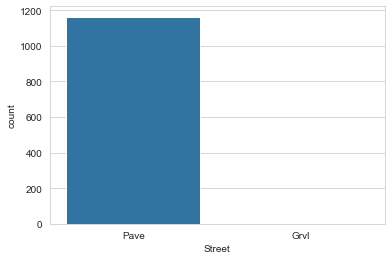

Street
Pave    181684.450172
Grvl    121110.750000
Name: SalePrice, dtype: float64


In [38]:
#Street
feature_details('Street')

In [39]:
df['Street'].value_counts()

Pave    1164
Grvl       4
Name: Street, dtype: int64

LotShape  has total unique values =  4 out of  1168
['IR1' 'Reg' 'IR2' 'IR3']
Feature datatype is =  object
Feature has  0.0 %  missing values


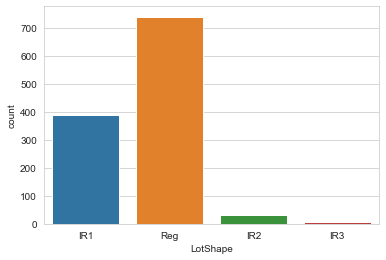

LotShape
IR2    233827.750000
IR3    226120.833333
IR1    206038.464103
Reg    165906.660811
Name: SalePrice, dtype: float64


In [40]:
#LotShape
feature_details('LotShape')

LandContour  has total unique values =  4 out of  1168
['Lvl' 'Bnk' 'HLS' 'Low']
Feature datatype is =  object
Feature has  0.0 %  missing values


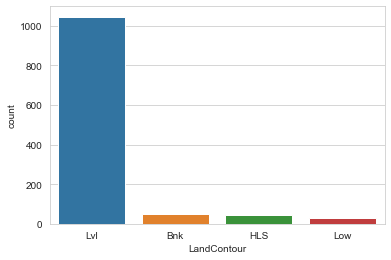

LandContour
HLS    214302.166667
Low    194393.333333
Lvl    181476.572658
Bnk    146163.140000
Name: SalePrice, dtype: float64


In [41]:
#LandContour
feature_details('LandContour')

In [42]:
df.head(2)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL          NaN     4928   Pave      IR1         Lvl   
1          20       RL         95.0    15865   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE     1Story   
1    Inside       Mod        NAmes       Norm       Norm     1Fam     1Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            6            5       1976          1976     Gable  CompShg   
1            8            6       1970          1970      Flat  Tar&Grv   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     Plywood     Plywood       None         0.0        TA        TA   
1     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       Gd       TA           No          ALQ         120   
1      PConc       TA       Gd           Gd          ALQ         351   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        958         1078    GasA        TA   
1          Rec         823       1043         2217    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       958         0             0        958   
1          Y      SBrkr      2217         0             0       2217   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          TA             5        Typ           1     Attchd       1977.0   
1          Gd             8        Typ           1     Attchd       1970.0   

  GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
0          RFn           2         440         TA         TA          Y   
1          Unf           2         621         TA         TA          Y   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0          205              0          0            0         0   
1          81          207              0          0          224         0   

   MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
0        0       2    2007       WD        Normal     128000  
1        0      10    2007       WD        Normal     268000

LotConfig  has total unique values =  5 out of  1168
['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
Feature datatype is =  object
Feature has  0.0 %  missing values


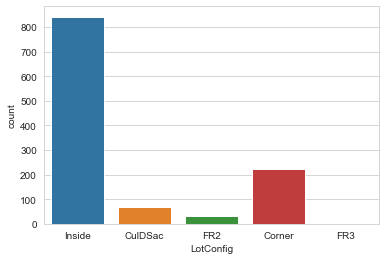

LotConfig
CulDSac    224594.463768
FR3        221500.000000
Corner     182427.635135
Inside     178003.105701
FR2        171138.636364
Name: SalePrice, dtype: float64


In [43]:
feature_details('LotConfig')

LandSlope  has total unique values =  3 out of  1168
['Gtl' 'Mod' 'Sev']
Feature datatype is =  object
Feature has  0.0 %  missing values


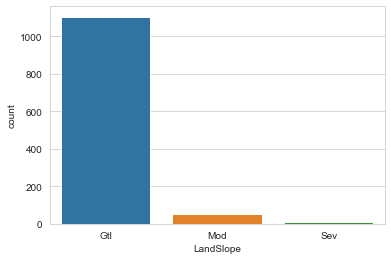

LandSlope
Sev    190160.833333
Mod    185353.313725
Gtl    181203.795475
Name: SalePrice, dtype: float64


In [44]:
#LandSlope
feature_details('LandSlope')

Neighborhood  has total unique values =  25 out of  1168
Feature datatype is =  object
Feature has  0.0 %  missing values


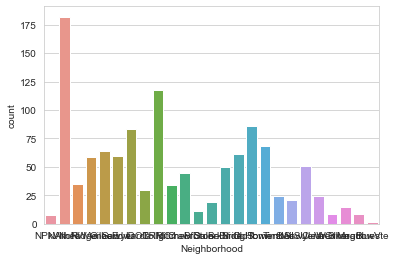

Neighborhood
NoRidge    341260.228571
NridgHt    312548.655738
StoneBr    301145.736842
Veenker    246833.333333
Timber     240579.291667
Somerst    222649.588235
ClearCr    216120.833333
Crawfor    208474.688889
CollgCr    199517.508475
Blmngtn    195987.000000
Gilbert    194790.093750
NWAmes     191643.305085
SawyerW    186909.647059
Mitchel    154654.411765
NAmes      146511.225275
SWISU      142587.333333
NPkVill    141968.750000
Blueste    137500.000000
Sawyer     135029.866667
OldTown    133947.197674
Edwards    128544.216867
BrkSide    122836.000000
BrDale     104081.818182
IDOTRR     101322.666667
MeadowV     88444.444444
Name: SalePrice, dtype: float64


In [45]:
#Neighborhood
feature_details('Neighborhood')

Condition1  has total unique values =  9 out of  1168
['Norm' 'Feedr' 'RRAn' 'PosA' 'RRAe' 'Artery' 'PosN' 'RRNe' 'RRNn']
Feature datatype is =  object
Feature has  0.0 %  missing values


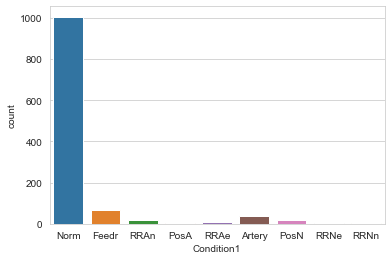

Condition1
RRNn      238000.000000
PosA      237833.333333
PosN      219264.705882
RRNe      190750.000000
RRAn      190074.850000
Norm      184692.003980
Feedr     142799.731343
RRAe      139044.444444
Artery    137926.315789
Name: SalePrice, dtype: float64


In [46]:
#Condition1
feature_details('Condition1')

In [47]:
df.groupby('Condition1')['SalePrice'].count()

Condition1
Artery      38
Feedr       67
Norm      1005
PosA         6
PosN        17
RRAe         9
RRAn        20
RRNe         2
RRNn         4
Name: SalePrice, dtype: int64

In [48]:
df[df['Condition1']=='RRNn']

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
279          70       RM         60.0     6155   Pave      IR1         Lvl   
418          20       RL         84.0    11670   Pave      IR1         Lvl   
463          60       RL          NaN     8755   Pave      IR1         Lvl   
493          20       RL         85.0    10182   Pave      IR1         Lvl   

    LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
279       FR3       Gtl      BrkSide       RRNn      Feedr     1Fam   
418    Corner       Gtl      Somerst       RRNn       Norm     1Fam   
463       FR2       Gtl      Gilbert       RRNn       Norm     1Fam   
493   CulDSac       Gtl      Somerst       RRNn       Norm     1Fam   

    HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
279     2Story            6            8       1920          1999     Gable   
418     1Story            9            5       2006          2006       Hip   
463     2Story            7            5       1999          1999     Gable   
493     1Story            8            5       2006          2006       Hip   

    RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
279  CompShg     Wd Sdng     Wd Sdng       None         0.0        TA   
418  CompShg     VinylSd     ImStucc      Stone       302.0        Ex   
463  CompShg     VinylSd     VinylSd    BrkFace       298.0        Gd   
493  CompShg     VinylSd     VinylSd      Stone       420.0        Gd   

    ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
279        TA     BrkTil       Fa       Fa           Mn          Unf   
418        TA      PConc       Ex       Gd           No          Unf   
463        TA      PConc       Gd       TA           No          ALQ   
493        TA      PConc       Ex       TA           Mn          GLQ   

     BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
279           0          Unf           0        611          611    GasA   
418           0          Unf           0       1905         1905    GasA   
463         772          Unf           0        220          992    GasA   
493        1220          Unf           0        440         1660    GasA   

    HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
279        Ex          Y      SBrkr       751       611             0   
418        Ex          Y      SBrkr      1905         0             0   
463        Ex          Y      SBrkr      1022      1038             0   
493        Ex          Y      SBrkr      1660         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
279       1362             0             0         2         0             3   
418       1905             0             0         2         0             3   
463       2060             1             0         2         1             3   
493       1660             1             0         2         0             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
279             1          TA             6        Typ           0     Detchd   
418             1          Ex             8        Typ           1     Attchd   
463             1          Gd             8        Typ           1    BuiltIn   
493             1          Gd             8        Typ           1     Attchd   

     GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond  \
279       1920.0          Fin           2         502         TA         Fa   
418       2006.0          Fin           3         788         TA         TA   
463       1999.0          RFn           2         390         TA         TA   
493       2006.0          RFn           2         500         TA         TA   

    PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
279          Y           0            0             84          0   
418          Y           0          191        

Condition2  has total unique values =  8 out of  1168
['Norm' 'RRAe' 'Feedr' 'PosN' 'Artery' 'RRNn' 'PosA' 'RRAn']
Feature datatype is =  object
Feature has  0.0 %  missing values


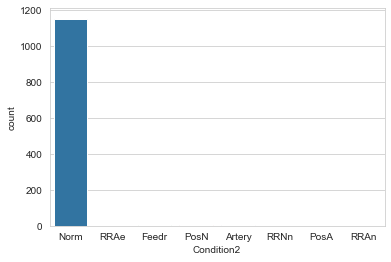

Condition2
PosA      325000.000000
PosN      284875.000000
RRAe      190000.000000
Norm      181697.129983
RRAn      136905.000000
RRNn      125000.000000
Feedr     121166.666667
Artery    106500.000000
Name: SalePrice, dtype: float64


In [49]:
#Condition2
feature_details('Condition2')


In [50]:
df['Condition2'].value_counts()

Norm      1154
Feedr        6
PosN         2
Artery       2
RRAe         1
RRNn         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

BldgType  has total unique values =  5 out of  1168
['TwnhsE' '1Fam' 'Duplex' 'Twnhs' '2fmCon']
Feature datatype is =  object
Feature has  0.0 %  missing values


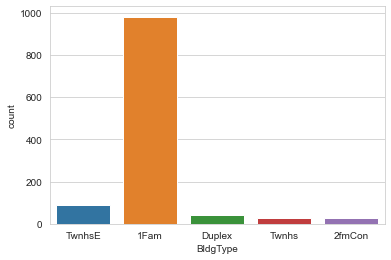

BldgType
TwnhsE    186066.111111
1Fam      185602.300714
Twnhs     139437.931034
Duplex    133871.609756
2fmCon    133737.037037
Name: SalePrice, dtype: float64


In [52]:
#BldgType
feature_details('BldgType')

HouseStyle  has total unique values =  8 out of  1168
['1Story' '2Story' '1.5Fin' 'SFoyer' '1.5Unf' 'SLvl' '2.5Fin' '2.5Unf']
Feature datatype is =  object
Feature has  0.0 %  missing values


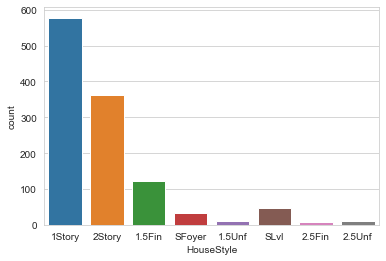

HouseStyle
2.5Fin    223285.714286
2Story    212193.515235
1Story    175940.826990
SLvl      170140.851064
2.5Unf    158690.000000
1.5Fin    138546.363636
SFoyer    137508.000000
1.5Unf    113216.666667
Name: SalePrice, dtype: float64


In [53]:
#HouseStyle
feature_details('HouseStyle')


OverallQual  has total unique values =  10 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


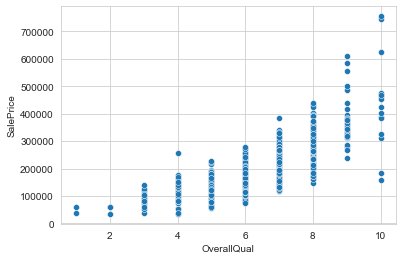

In [54]:
#OverallQual
feature_details('OverallQual')

OverallCond  has total unique values =  9 out of  1168
[5 6 7 4 8 2 3 9 1]
Feature datatype is =  int64
Feature has  0.0 %  missing values


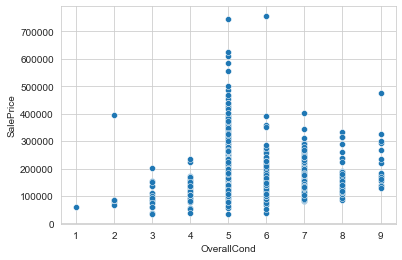

In [55]:
#OverallCond
feature_details('OverallCond')

In [56]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPo

YearBuilt  has total unique values =  110 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


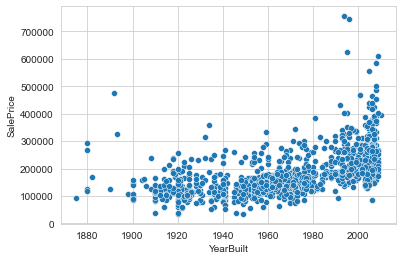

In [57]:
#YearBuilt
feature_details('YearBuilt')

YearRemodAdd  has total unique values =  61 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


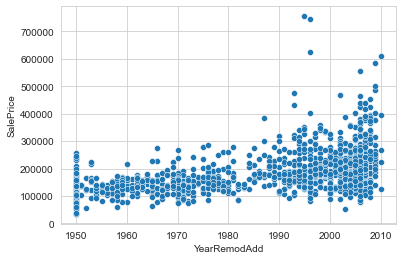

In [58]:
#YearRemodAdd
feature_details('YearRemodAdd')

YearRemodAdd  has total unique values =  61 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


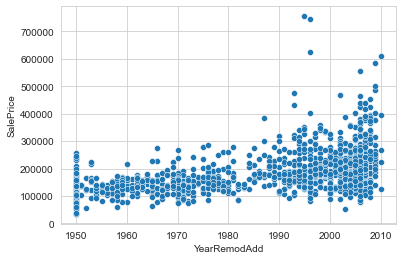

In [59]:
#YearRemodAdd
feature_details('YearRemodAdd')

In [60]:
df['RoofStyle'].value_counts()

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64

In [61]:
df[df['RoofStyle']=='Shed']

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
32           90       RL          NaN    18890   Pave      IR1         Lvl   
211          40       RL          NaN    23595   Pave      Reg         Low   

    LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
32     Inside       Gtl       Sawyer      Feedr       RRAe   Duplex   
211    Inside       Sev      ClearCr       Norm       Norm     1Fam   

    HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
32      1.5Fin            5            5       1977          1977      Shed   
211     1Story            7            6       1979          1979      Shed   

    RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
32   CompShg     Plywood     Plywood       None         1.0        TA   
211  WdShake     Plywood     Plywood       None         0.0        Gd   

    ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
32         TA     CBlock       Gd       TA           No          GLQ   
211        TA      PConc       Gd       TA           Gd          GLQ   

     BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
32          498          Rec         211        652         1361    GasA   
211        1258          Unf           0         74         1332    GasA   

    HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
32         Ex          Y      SBrkr      1361      1259             0   
211        TA          Y      SBrkr      1332       192             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
32        2620             0             0         2         2             4   
211       1524             2             0         0         1             0   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
32              2          TA            12        Typ           1    BuiltIn   
211             1          Gd             4        Typ           1     Attchd   

     GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond  \
32        1977.0          RFn           2         600         TA         TA   
211       1979.0          Fin           2         586         TA         TA   

    PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
32           N         155           24            145          0   
211          Y         268            0              0          0   

     ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  \
32             0         0     8300       8    2007       WD        Normal   
211            0         0        0       4    2010       WD        Normal   

     SalePrice  
32      190000  
211     260000

RoofMatl  has total unique values =  8 out of  1168
['CompShg' 'Tar&Grv' 'WdShngl' 'WdShake' 'Roll' 'ClyTile' 'Metal'
 'Membran']
Feature datatype is =  object
Feature has  0.0 %  missing values


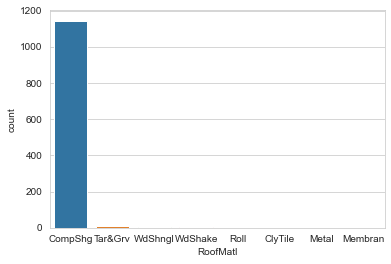

RoofMatl
WdShngl    390250.000000
WdShake    254250.000000
Membran    241500.000000
Tar&Grv    195747.000000
CompShg    180009.329545
Metal      180000.000000
ClyTile    160000.000000
Roll       137000.000000
Name: SalePrice, dtype: float64


In [62]:
#RoofMatl
feature_details('RoofMatl')

Exterior1st  has total unique values =  14 out of  1168
Feature datatype is =  object
Feature has  0.0 %  missing values


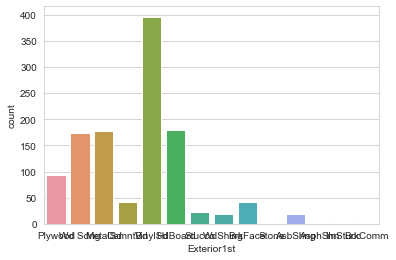

Exterior1st
ImStucc    262000.000000
Stone      258500.000000
CemntBd    242928.476190
VinylSd    215359.676768
BrkFace    198391.463415
Plywood    178890.075269
HdBoard    163432.648045
Stucco     160602.272727
WdShing    155481.578947
Wd Sdng    152572.724138
MetalSd    148498.196629
AsbShng    107774.263158
AsphShn    100000.000000
BrkComm     60000.000000
Name: SalePrice, dtype: float64


In [63]:
#Exterior1st
feature_details('Exterior1st')

Exterior2nd  has total unique values =  15 out of  1168
Feature datatype is =  object
Feature has  0.0 %  missing values


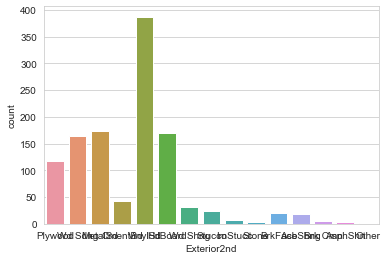

Exterior2nd
Other      319000.000000
ImStucc    273712.500000
CmentBd    247940.380952
VinylSd    215607.100775
BrkFace    194772.500000
Stone      174406.000000
Plywood    169979.042373
HdBoard    168398.200000
Wd Shng    156650.000000
Stucco     153066.695652
Wd Sdng    152218.969697
MetalSd    148570.398844
AsphShn    138000.000000
Brk Cmn    131300.000000
AsbShng    114372.833333
Name: SalePrice, dtype: float64


In [64]:
#Exterior2nd
feature_details('Exterior2nd')

MasVnrType  has total unique values =  4 out of  1168
['None' 'BrkFace' 'Stone' 'BrkCmn' nan]
Feature datatype is =  object
Feature has  0.5993150684931506 %  missing values


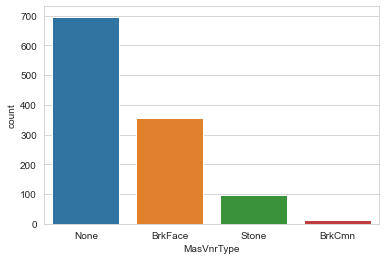

MasVnrType
Stone      261417.867347
BrkFace    205275.432203
None       158226.787356
BrkCmn     141990.076923
Name: SalePrice, dtype: float64


In [65]:
#MasVnrType
feature_details('MasVnrType')

MasVnrArea  has total unique values =  283 out of  1168
Feature datatype is =  float64
Feature has  0.5993150684931506 %  missing values


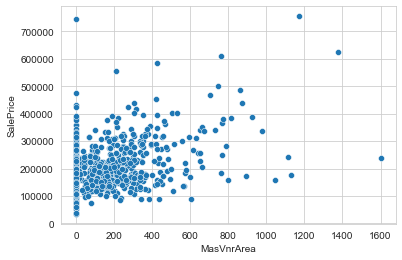

In [66]:
#MasVnrArea
feature_details('MasVnrArea')

ExterQual  has total unique values =  4 out of  1168
['TA' 'Gd' 'Ex' 'Fa']
Feature datatype is =  object
Feature has  0.0 %  missing values


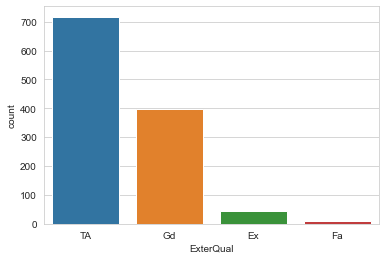

ExterQual
Ex    357817.651163
Gd    231009.743073
TA    144918.163180
Fa     87435.727273
Name: SalePrice, dtype: float64


In [67]:
#ExterQual
feature_details('ExterQual')


ExterCond  has total unique values =  5 out of  1168
['TA' 'Gd' 'Fa' 'Po' 'Ex']
Feature datatype is =  object
Feature has  0.0 %  missing values


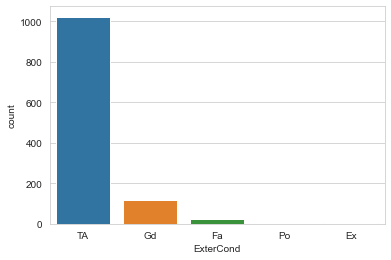

ExterCond
Ex    243000.000000
TA    184551.990215
Gd    171391.837607
Fa    105294.769231
Po     76500.000000
Name: SalePrice, dtype: float64


In [68]:
#ExterCond
feature_details('ExterCond')

Foundation  has total unique values =  6 out of  1168
['CBlock' 'PConc' 'BrkTil' 'Slab' 'Stone' 'Wood']
Feature datatype is =  object
Feature has  0.0 %  missing values


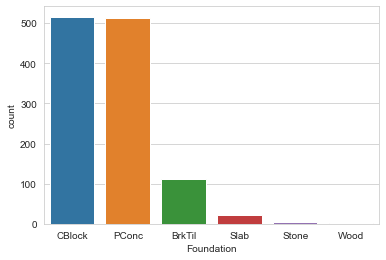

Foundation
PConc     225757.504873
Stone     177651.000000
Wood      164000.000000
CBlock    149858.994186
BrkTil    137895.285714
Slab      110846.428571
Name: SalePrice, dtype: float64


In [69]:
#Foundation
feature_details('Foundation')

BsmtQual  has total unique values =  4 out of  1168
['Gd' 'TA' 'Ex' nan 'Fa']
Feature datatype is =  object
Feature has  2.5684931506849313 %  missing values


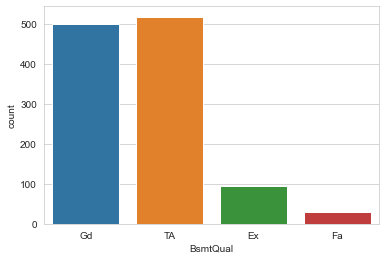

BsmtQual
Ex    331469.978723
Gd    203225.445783
TA    140898.736944
Fa    121349.000000
Name: SalePrice, dtype: float64


In [70]:
#Basement
#BsmtQual
feature_details('BsmtQual')

BsmtCond  has total unique values =  4 out of  1168
['TA' 'Gd' 'Fa' nan 'Po']
Feature datatype is =  object
Feature has  2.5684931506849313 %  missing values


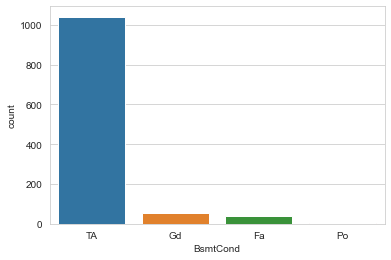

BsmtCond
Gd    219908.107143
TA    184018.669549
Fa    121075.102564
Po     64000.000000
Name: SalePrice, dtype: float64


In [71]:
#BsmtCond
feature_details('BsmtCond')


BsmtExposure  has total unique values =  4 out of  1168
['No' 'Gd' 'Av' 'Mn' nan]
Feature datatype is =  object
Feature has  2.654109589041096 %  missing values


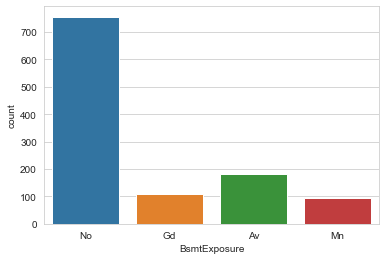

BsmtExposure
Gd    250581.138889
Av    204174.861111
Mn    194213.838710
No    167539.144180
Name: SalePrice, dtype: float64


In [72]:
#BsmtExposure
feature_details('BsmtExposure')

BsmtFinType1  has total unique values =  6 out of  1168
['ALQ' 'GLQ' 'BLQ' 'Unf' 'Rec' 'LwQ' nan]
Feature datatype is =  object
Feature has  2.5684931506849313 %  missing values


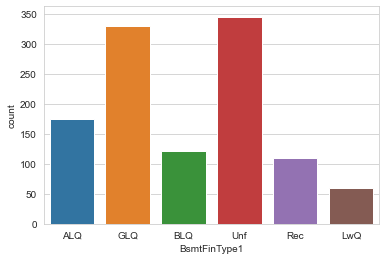

BsmtFinType1
GLQ    236871.596970
Unf    172159.521739
ALQ    161003.879310
BLQ    152803.396694
LwQ    152712.711864
Rec    143592.844037
Name: SalePrice, dtype: float64


In [73]:
#BsmtFinType1
feature_details('BsmtFinType1')

In [74]:
#BsmtFinType2

BsmtFinType2  has total unique values =  6 out of  1168
['Unf' 'Rec' 'BLQ' 'GLQ' nan 'ALQ' 'LwQ']
Feature datatype is =  object
Feature has  2.654109589041096 %  missing values


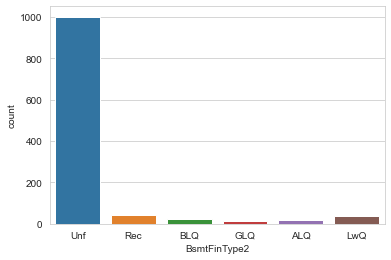

BsmtFinType2
GLQ    194937.500000
ALQ    194712.500000
Unf    185077.455090
LwQ    168846.250000
Rec    164477.325581
BLQ    154815.958333
Name: SalePrice, dtype: float64


In [75]:
feature_details('BsmtFinType2')

BsmtFinSF2  has total unique values =  122 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


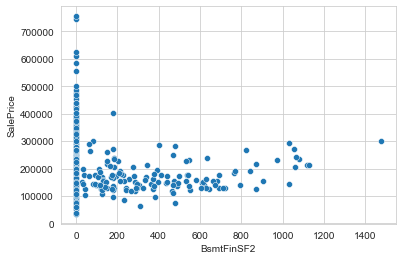

In [76]:
#BsmtFinSF2
feature_details('BsmtFinSF2')


In [77]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPo

BsmtUnfSF  has total unique values =  681 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


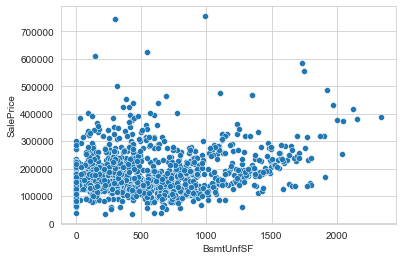

In [78]:
#BsmtUnfSF
feature_details('BsmtUnfSF')


In [79]:
#Atmosphere
#Heating

Heating  has total unique values =  6 out of  1168
['GasA' 'GasW' 'Floor' 'OthW' 'Wall' 'Grav']
Feature datatype is =  object
Feature has  0.0 %  missing values


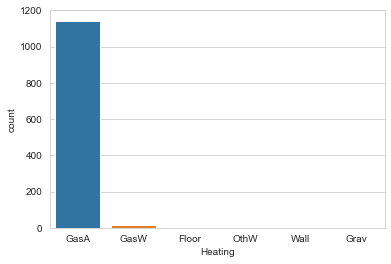

Heating
GasA     182591.394576
GasW     167312.785714
OthW     129500.000000
Wall      92100.000000
Floor     72500.000000
Grav      70080.000000
Name: SalePrice, dtype: float64


In [80]:
feature_details('Heating')

Heating  has total unique values =  6 out of  1168
['GasA' 'GasW' 'Floor' 'OthW' 'Wall' 'Grav']
Feature datatype is =  object
Feature has  0.0 %  missing values


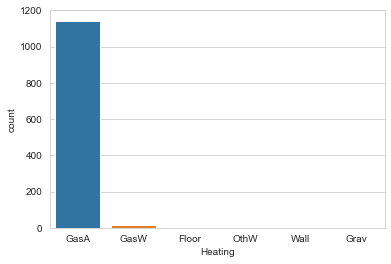

Heating
GasA     182591.394576
GasW     167312.785714
OthW     129500.000000
Wall      92100.000000
Floor     72500.000000
Grav      70080.000000
Name: SalePrice, dtype: float64


In [81]:
feature_details('Heating')

CentralAir  has total unique values =  2 out of  1168
['Y' 'N']
Feature datatype is =  object
Feature has  0.0 %  missing values


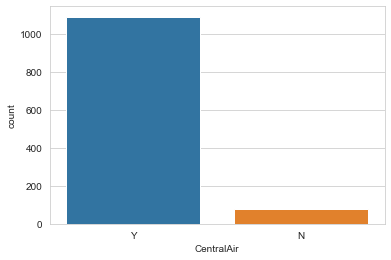

CentralAir
Y    186696.381651
N    108539.576923
Name: SalePrice, dtype: float64


In [82]:
#CentralAir
feature_details('CentralAir')

In [83]:
df['CentralAir'].value_counts(normalize=True)

Y    0.933219
N    0.066781
Name: CentralAir, dtype: float64

In [84]:
df['CentralAir'].value_counts(normalize=True)

Y    0.933219
N    0.066781
Name: CentralAir, dtype: float64

1stFlrSF  has total unique values =  669 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


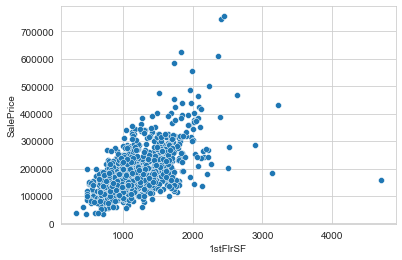

In [85]:
#1stFlrSF
feature_details('1stFlrSF')

2ndFlrSF  has total unique values =  351 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


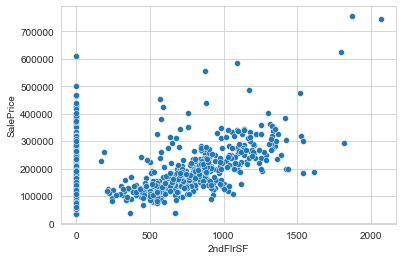

In [86]:
#2ndFlrSF
feature_details('2ndFlrSF')

In [87]:
#LowQualFinSF

LowQualFinSF  has total unique values =  21 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


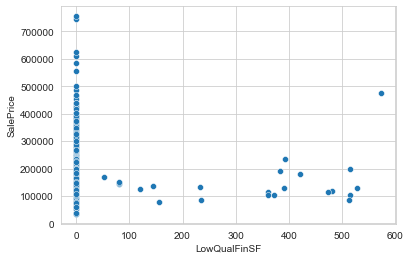

In [88]:
feature_details('LowQualFinSF')

GrLivArea  has total unique values =  746 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


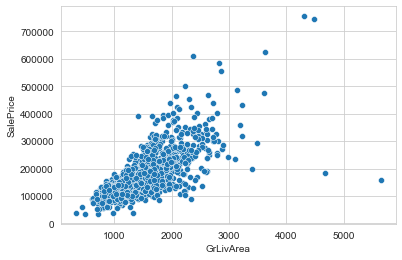

In [89]:
#GrLivArea
feature_details('GrLivArea')

BsmtFullBath  has total unique values =  4 out of  1168
[0 1 2 3]
Feature datatype is =  int64
Feature has  0.0 %  missing values


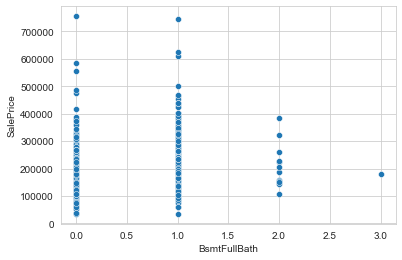

In [90]:
#BsmtFullBath
feature_details('BsmtFullBath')

In [91]:
#df['BsmtFullBath'].value_counts()

BsmtHalfBath  has total unique values =  3 out of  1168
[0 1 2]
Feature datatype is =  int64
Feature has  0.0 %  missing values


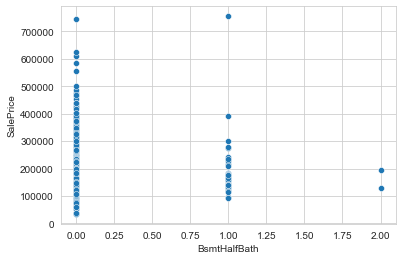

In [92]:
#BsmtHalfBath
feature_details('BsmtHalfBath')

In [93]:
df['BsmtHalfBath'].value_counts()

0    1105
1      61
2       2
Name: BsmtHalfBath, dtype: int64

FullBath  has total unique values =  4 out of  1168
[2 1 3 0]
Feature datatype is =  int64
Feature has  0.0 %  missing values


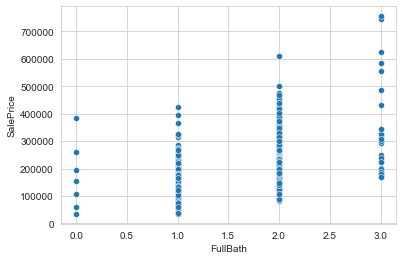

In [94]:
#FullBath
feature_details('FullBath')

In [95]:
df['FullBath'].value_counts()

2    610
1    524
3     27
0      7
Name: FullBath, dtype: int64

HalfBath  has total unique values =  3 out of  1168
[0 1 2]
Feature datatype is =  int64
Feature has  0.0 %  missing values


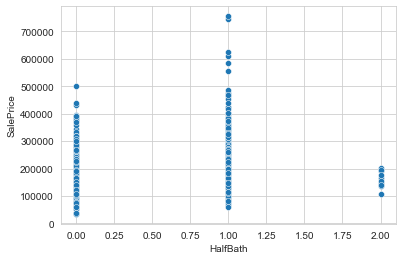

In [96]:
#HalfBath
feature_details('HalfBath')

BedroomAbvGr  has total unique values =  8 out of  1168
[2 4 3 1 5 0 6 8]
Feature datatype is =  int64
Feature has  0.0 %  missing values


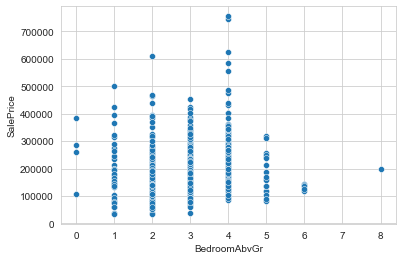

In [97]:
#Bedroom
feature_details('BedroomAbvGr')

In [98]:
df['BedroomAbvGr'].value_counts()

3    640
2    281
4    180
1     39
5     18
6      5
0      4
8      1
Name: BedroomAbvGr, dtype: int64

KitchenAbvGr  has total unique values =  4 out of  1168
[1 2 3 0]
Feature datatype is =  int64
Feature has  0.0 %  missing values


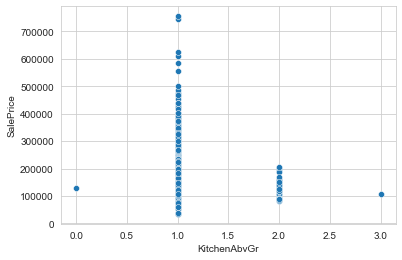

In [99]:
#KitchenAbvGr
feature_details('KitchenAbvGr')

KitchenQual  has total unique values =  4 out of  1168
['TA' 'Gd' 'Ex' 'Fa']
Feature datatype is =  object
Feature has  0.0 %  missing values


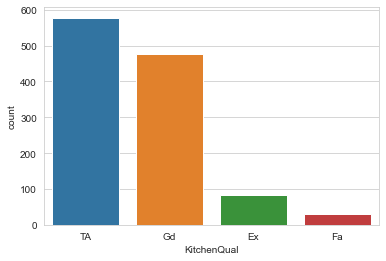

KitchenQual
Ex    327812.329268
Gd    211076.234310
TA    140206.313149
Fa    105028.100000
Name: SalePrice, dtype: float64


In [101]:
#KitchenAbvGr
feature_details('KitchenQual')

TotRmsAbvGrd  has total unique values =  12 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


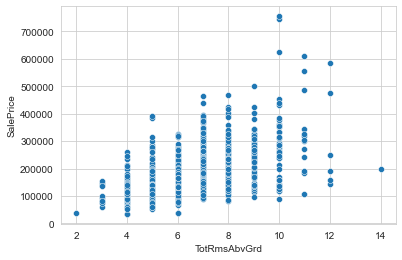

In [102]:
#TotRmsAbvGrd
feature_details('TotRmsAbvGrd')


TotRmsAbvGrd  has total unique values =  12 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


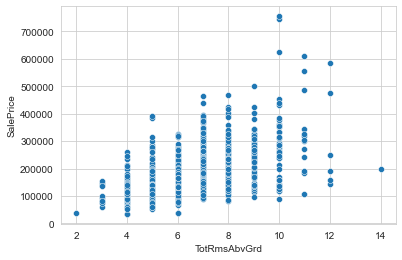

In [103]:
#TotRmsAbvGrd
feature_details('TotRmsAbvGrd')


Fireplaces  has total unique values =  4 out of  1168
[1 0 2 3]
Feature datatype is =  int64
Feature has  0.0 %  missing values


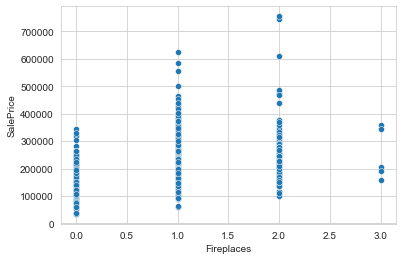

In [104]:
#Fireplaces
feature_details('Fireplaces')

Fireplaces  has total unique values =  4 out of  1168
[1 0 2 3]
Feature datatype is =  int64
Feature has  0.0 %  missing values


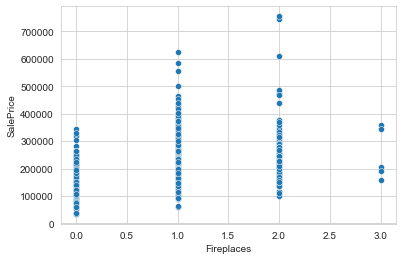

In [105]:
#Fireplaces
feature_details('Fireplaces')

GarageType  has total unique values =  6 out of  1168
['Attchd' 'BuiltIn' 'Detchd' 'Basment' nan '2Types' 'CarPort']
Feature datatype is =  object
Feature has  5.47945205479452 %  missing values


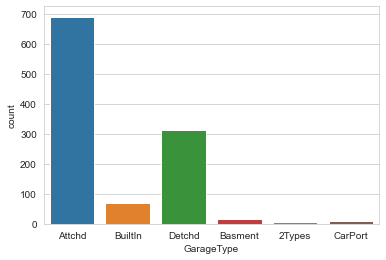

GarageType
BuiltIn    254970.900000
Attchd     203675.839363
Basment    160708.937500
2Types     144200.000000
Detchd     135873.799363
CarPort    109957.375000
Name: SalePrice, dtype: float64


In [106]:
#GarageType
feature_details('GarageType')

GarageYrBlt  has total unique values =  97 out of  1168
Feature datatype is =  float64
Feature has  5.47945205479452 %  missing values


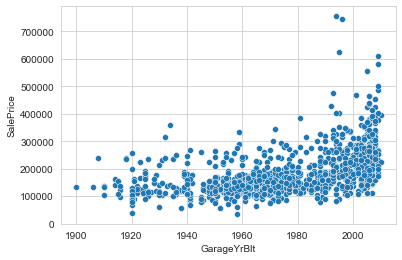

In [107]:
#GarageYrBlt
feature_details('GarageYrBlt')

GarageFinish  has total unique values =  3 out of  1168
['RFn' 'Unf' 'Fin' nan]
Feature datatype is =  object
Feature has  5.47945205479452 %  missing values


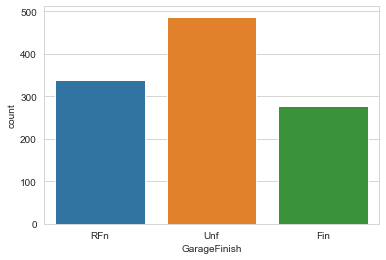

GarageFinish
Fin    241223.809353
RFn    201925.554572
Unf    143555.156057
Name: SalePrice, dtype: float64


In [108]:
#GarageFinish
feature_details('GarageFinish')


GarageCars  has total unique values =  5 out of  1168
[2 3 1 0 4]
Feature datatype is =  int64
Feature has  0.0 %  missing values


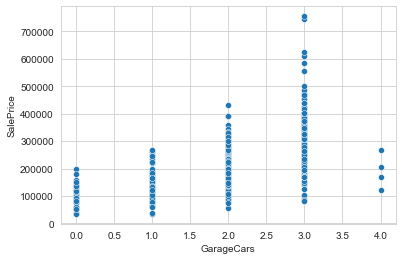

In [109]:
#GarageCars
feature_details('GarageCars')

GarageArea  has total unique values =  392 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


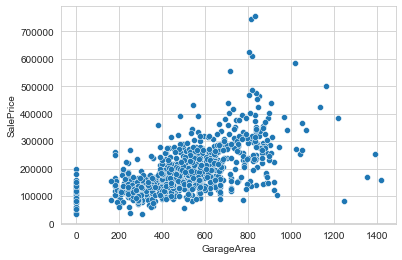

In [110]:
#GarageArea
feature_details('GarageArea')

GarageQual  has total unique values =  5 out of  1168
['TA' 'Fa' nan 'Gd' 'Ex' 'Po']
Feature datatype is =  object
Feature has  5.47945205479452 %  missing values


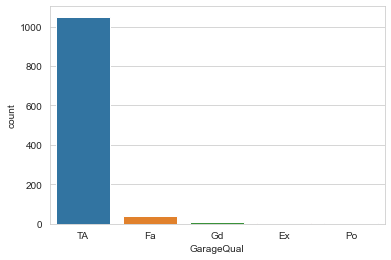

GarageQual
Ex    297750.000000
Gd    219822.727273
TA    187753.449524
Fa    129889.000000
Po    102000.000000
Name: SalePrice, dtype: float64


In [111]:
#GarageQual
feature_details('GarageQual')

GarageCond  has total unique values =  5 out of  1168
['TA' 'Fa' 'Gd' nan 'Po' 'Ex']
Feature datatype is =  object
Feature has  5.47945205479452 %  missing values


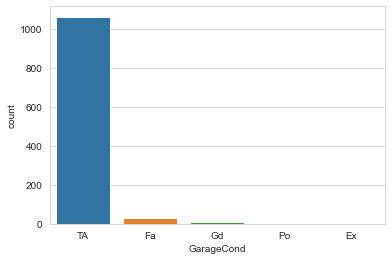

GarageCond
TA    188483.112158
Gd    179921.250000
Ex    120500.000000
Fa    115031.821429
Po    110500.000000
Name: SalePrice, dtype: float64


In [112]:
#GarageCond
feature_details('GarageCond')

PavedDrive  has total unique values =  3 out of  1168
['Y' 'N' 'P']
Feature datatype is =  object
Feature has  0.0 %  missing values


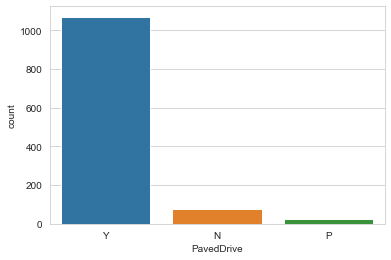

PavedDrive
Y    187006.026144
P    133326.086957
N    116421.472973
Name: SalePrice, dtype: float64


In [113]:
#PavedDrive
feature_details('PavedDrive')

PavedDrive  has total unique values =  3 out of  1168
['Y' 'N' 'P']
Feature datatype is =  object
Feature has  0.0 %  missing values


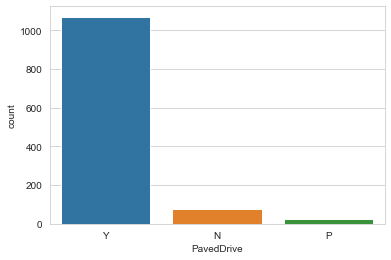

PavedDrive
Y    187006.026144
P    133326.086957
N    116421.472973
Name: SalePrice, dtype: float64


In [114]:
#PavedDrive
feature_details('PavedDrive')

OpenPorchSF  has total unique values =  176 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


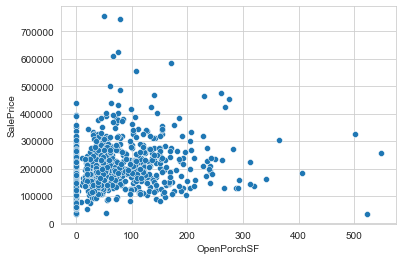

In [115]:
#OpenPorchSF
feature_details('OpenPorchSF')

EnclosedPorch  has total unique values =  106 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


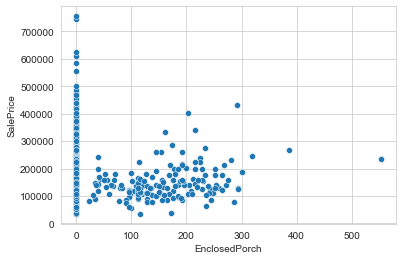

In [116]:
#EnclosedPorch
feature_details('EnclosedPorch')

3SsnPorch  has total unique values =  18 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


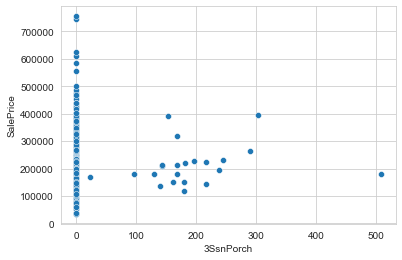

In [117]:
#3SsnPorch
feature_details('3SsnPorch')

ScreenPorch  has total unique values =  65 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


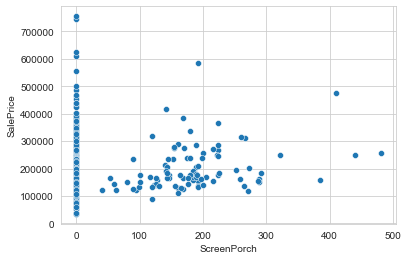

In [118]:
#ScreenPorch
feature_details('ScreenPorch')


PoolArea  has total unique values =  8 out of  1168
[  0 555 576 738 519 480 648 512]
Feature datatype is =  int64
Feature has  0.0 %  missing values


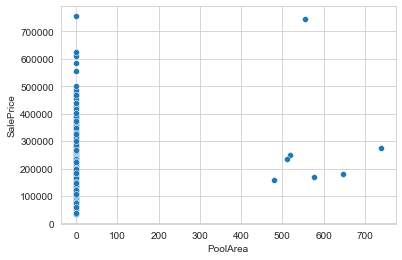

In [119]:
#PoolArea
feature_details('PoolArea')

PoolArea  has total unique values =  8 out of  1168
[  0 555 576 738 519 480 648 512]
Feature datatype is =  int64
Feature has  0.0 %  missing values


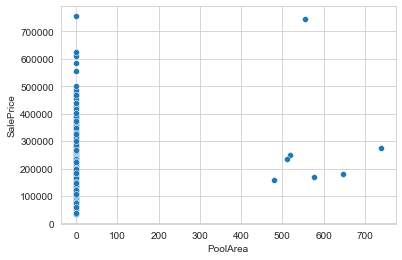

In [120]:
#PoolArea
feature_details('PoolArea')

MoSold  has total unique values =  12 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


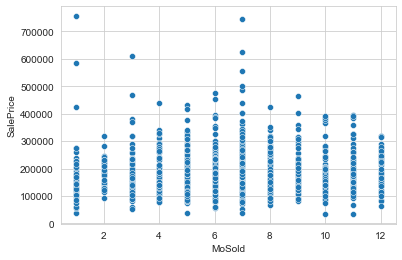

In [121]:
#MoSold
feature_details('MoSold')


YrSold  has total unique values =  5 out of  1168
[2007 2010 2009 2006 2008]
Feature datatype is =  int64
Feature has  0.0 %  missing values


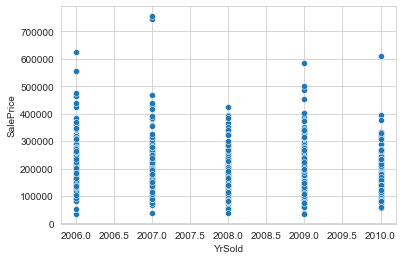

In [122]:
#YrSold
feature_details('YrSold')

In [123]:
df['YrSold'].value_counts()

2007    264
2009    260
2006    254
2008    248
2010    142
Name: YrSold, dtype: int64

SaleType  has total unique values =  9 out of  1168
['WD' 'COD' 'New' 'ConLI' 'ConLw' 'Con' 'ConLD' 'Oth' 'CWD']
Feature datatype is =  object
Feature has  0.0 %  missing values


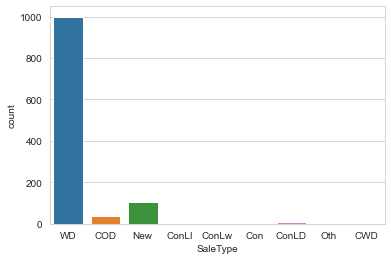

SaleType
New      271104.500000
Con      269600.000000
ConLI    200390.000000
WD       173668.456456
CWD      171166.666667
COD      146722.368421
ConLD    146141.000000
ConLw    143625.000000
Oth      119850.000000
Name: SalePrice, dtype: float64


In [125]:
#SaleType
feature_details('SaleType')

SaleCondition  has total unique values =  6 out of  1168
['Normal' 'Partial' 'Abnorml' 'Family' 'Alloca' 'AdjLand']
Feature datatype is =  object
Feature has  0.0 %  missing values


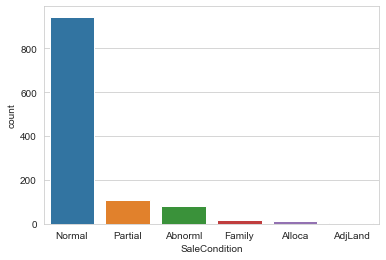

SaleCondition
Partial    269585.231481
Normal     175436.408466
Alloca     167377.416667
Family     149138.888889
Abnorml    147567.938272
AdjLand    104125.000000
Name: SalePrice, dtype: float64


In [126]:
#SaleCondition
feature_details('SaleCondition')


In [127]:
# df[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]
# as 3 features are providing same information as 1 feature, lets drop those 3 features and have that 1 

df.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'], axis=1, inplace=True)
df.shape

(1168, 71)

In [129]:
continuous= [x for x in df.columns if df[x].dtypes!='O']
categorical= [x for x in df.columns if df[x].dtypes=='O']

In [130]:
len(continuous), len(categorical), df.shape[1]

(34, 37, 71)

In [131]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL          NaN     4928   Pave      IR1         Lvl   
1          20       RL         95.0    15865   Pave      IR1         Lvl   
2          60       RL         92.0     9920   Pave      IR1         Lvl   
3          20       RL        105.0    11751   Pave      IR1         Lvl   
4          20       RL          NaN    16635   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE     1Story   
1    Inside       Mod        NAmes       Norm       Norm     1Fam     1Story   
2   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam     2Story   
3    Inside       Gtl       NWAmes       Norm       Norm     1Fam     1Story   
4       FR2       Gtl       NWAmes       Norm       Norm     1Fam     1Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            6            5       1976          1976     Gable  CompShg   
1            8            6       1970          1970      Flat  Tar&Grv   
2            7            5       1996          1997     Gable  CompShg   
3            6            6       1977          1977       Hip  CompShg   
4            6            7       1977          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     Plywood     Plywood       None         0.0        TA        TA   
1     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd   
2     MetalSd     MetalSd       None         0.0        Gd        TA   
3     Plywood     Plywood    BrkFace       480.0        TA        TA   
4     CemntBd     CmentBd      Stone       126.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0     CBlock       Gd       TA           No          ALQ          Unf   
1      PConc       TA       Gd           Gd          ALQ          Rec   
2      PConc       Gd       TA           Av          GLQ          Unf   
3     CBlock       Gd       TA           No          BLQ          Unf   
4     CBlock       Gd       TA           No          ALQ          Unf   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0         1078    GasA        TA          Y      SBrkr       958         0   
1         2217    GasA        Ex          Y      SBrkr      2217         0   
2         1117    GasA        Ex          Y      SBrkr      1127       886   
3         1844    GasA        Ex          Y      SBrkr      1844         0   
4         1602    GasA        Gd          Y      SBrkr      1602         0   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0        958             0             0         2         0   
1             0       2217             1             0         2         0   
2             0       2013             1             0         2         1   
3             0       1844             0             0         2         0   
4             0       1602             0             1         2         0   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             2             1          TA             5        Typ   
1             4             1          Gd             8        Typ   
2             3             1          TA             8        Typ   
3             3             1          TA             7        Typ   
4             3             1          Gd             8        Typ   

   Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
0           1     Attchd       1977.0          RFn           2         440   
1           1     Attchd       1970.0          Unf           2         621   
2           1     Attchd       1997.0          Unf           2         455   
3           1     Attchd       1977.0          RFn           2         

In [132]:
df['LotFrontage'].dtypes  , df['GarageYrBlt'].dtypes , df['MasVnrArea'].dtypes

(dtype('float64'), dtype('float64'), dtype('float64'))

In [133]:
df['LotFrontage'].mode()

0    60.0
Name: LotFrontage, dtype: float64

In [135]:
#Fill Null Vlaues
# Continuous feature null values

cont_null=[x for x in continuous if df[x].isnull().sum()>0]

for i in cont_null:
    df[i].fillna(df[i].mode()[0],inplace=True)
df[cont_null].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [136]:
df[continuous].isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [137]:
df[categorical].isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        7
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         30
BsmtCond         30
BsmtExposure     31
BsmtFinType1     30
BsmtFinType2     31
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
KitchenQual       0
Functional        0
GarageType       64
GarageFinish     64
GarageQual       64
GarageCond       64
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [138]:
cat_null=[x for x in categorical if df[x].isnull().sum()>0]

for i in cat_null:
    df[i].fillna(df[i].mode()[0],inplace=True)
df[categorical].isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [139]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt 

In [140]:
# All Missing Values handled

In [141]:
#Outliers
# Basically, we check and handle outliers in continuous features only

# There are many methods to check outliers, we use here BoxPlot

df[continuous]

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0            120         60.0     4928            6            5       1976   
1             20         95.0    15865            8            6       1970   
2             60         92.0     9920            7            5       1996   
3             20        105.0    11751            6            6       1977   
4             20         60.0    16635            6            7       1977   
5             60         58.0    14054            7            5       2006   
6             20         60.0    11341            5            6       1957   
7             20         88.0    13125            5            4       1957   
8             20         70.0     9170            5            7       1965   
9             50         80.0     8480            5            5       1947   
10            50         50.0     8600            6            6       1937   
11            60         44.0     9548            7            6       2003   
12            20        129.0     9196            7            5       2003   
13            20         80.0     8892            5            5       1960   
14            50         59.0    16466            5            7       1955   
15            70         55.0    10592            6            7       1923   
16            30         60.0     5890            6            8       1930   
17            20         64.0     7314            7            5       2007   
18            20         60.0     7917            6            7       1976   
19           160         24.0     2016            5            5       1970   
20            60         80.0    12435            7            5       2001   
21            85         70.0     8445            5            7       1972   
22            20         68.0     9717            5            6       1950   
23            20         60.0    10659            5            6       1961   
24            20         71.0     9230            5            8       1965   
25            20         60.0    21000            6            5       1953   
26            30         60.0    25339            5            7       1918   
27            20         88.0    11394            9            2       2010   
28            45         58.0     6380            5            6       1922   
29            70         74.0    11988            6            7       1934   
30           120         61.0     7658            9            5       2005   
31            60         60.0     3378            7            8       1946   
32            90         60.0    18890            5            5       1977   
33            50         60.0    12358            5            6       1941   
34            60         60.0    14762            5            6       1948   
35            20        120.0    10356            5            6       1975   
36            20         80.0    10400            7            5       1976   
37            20         84.0    12615            6            7       1950   
38            85         60.0     7540            6            6       1978   
39            40         50.0     9100            5            6       1930   
40            20        141.0    31770            6            5       1960   
41            20         70.0    13300            5            7       1956   
42           160         30.0     3180            7            5       2005   
43           160         24.0     2522            6            5       2004   
44            80         65.0     8385            5            8       1977   
45            20         76.0     8314            5            7       1982   
46            60         60.0     8123            6            5       2000   
47            20        100.0    12000            5            7       1948   
48            20         50.0     5000            1            3       1946   
49            20         70.0     7931            5     

Before that we need to handle features with Years details:

YearBuilt - when house build
YearRemodAdd  - when modification done
GarageYrBlt - garage build year
yearsold - when the house sold

we can extract some useful information from here, like total age of house at the time of sell years after modification at the time of sell garage age at the time of sell we even dnt require YrSold if we able to collect abouve informations because these details will definately help

In [142]:
df['HouseAge']= df['YrSold']-df['YearBuilt']
df['ModificationAge']=df['YrSold']-df['YearRemodAdd']
df['GarageAge']=df['YrSold']-df['GarageYrBlt']


In [143]:
# So now, we can drop the year feature

df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], axis=1, inplace=True)

In [145]:
df[[x for x in df.columns if df[x].dtypes !='O' ]]

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0            120         60.0     4928            6            5         0.0   
1             20         95.0    15865            8            6         0.0   
2             60         92.0     9920            7            5         0.0   
3             20        105.0    11751            6            6       480.0   
4             20         60.0    16635            6            7       126.0   
5             60         58.0    14054            7            5         0.0   
6             20         60.0    11341            5            6       180.0   
7             20         88.0    13125            5            4        67.0   
8             20         70.0     9170            5            7         0.0   
9             50         80.0     8480            5            5         0.0   
10            50         50.0     8600            6            6         0.0   
11            60         44.0     9548            7            6       223.0   
12            20        129.0     9196            7            5         0.0   
13            20         80.0     8892            5            5        66.0   
14            50         59.0    16466            5            7         0.0   
15            70         55.0    10592            6            7         0.0   
16            30         60.0     5890            6            8         0.0   
17            20         64.0     7314            7            5        82.0   
18            20         60.0     7917            6            7       174.0   
19           160         24.0     2016            5            5       304.0   
20            60         80.0    12435            7            5       172.0   
21            85         70.0     8445            5            7         0.0   
22            20         68.0     9717            5            6         0.0   
23            20         60.0    10659            5            6         0.0   
24            20         71.0     9230            5            8       166.0   
25            20         60.0    21000            6            5       184.0   
26            30         60.0    25339            5            7         0.0   
27            20         88.0    11394            9            2       350.0   
28            45         58.0     6380            5            6         0.0   
29            70         74.0    11988            6            7         0.0   
30           120         61.0     7658            9            5       412.0   
31            60         60.0     3378            7            8         0.0   
32            90         60.0    18890            5            5         1.0   
33            50         60.0    12358            5            6         0.0   
34            60         60.0    14762            5            6         0.0   
35            20        120.0    10356            5            6         0.0   
36            20         80.0    10400            7            5       189.0   
37            20         84.0    12615            6            7         0.0   
38            85         60.0     7540            6            6         0.0   
39            40         50.0     9100            5            6         0.0   
40            20        141.0    31770            6            5       112.0   
41            20         70.0    13300            5            7         0.0   
42           160         30.0     3180            7            5         0.0   
43           160         24.0     2522            6            5        50.0   
44            80         65.0     8385            5            8       220.0   
45            20         76.0     8314            5            7         0.0   
46            60         60.0     8123            6            5        16.0   
47            20        100.0    12000            5            7         0.0   
48            20         50.0     5000            1            3         0.0   
49    

In [146]:
# many continuous features are is categorical in nature, we have to avoid outlier detection on those features

outlier=['LotFrontage','LotArea','MasVnrArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','MoSold','HouseAge','ModificationAge','GarageAge']

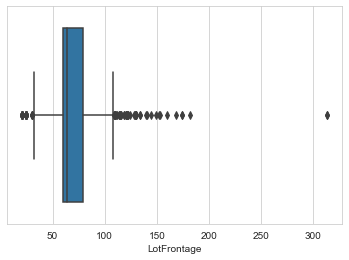

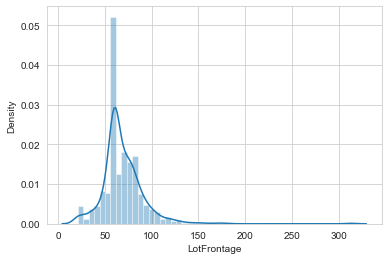

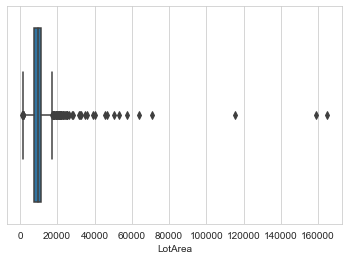

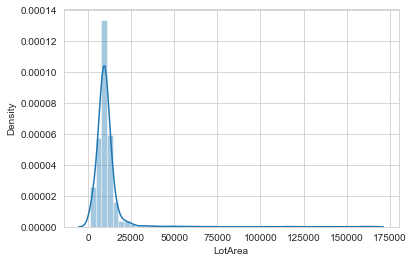

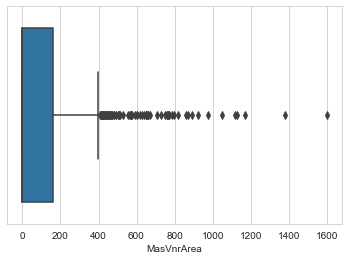

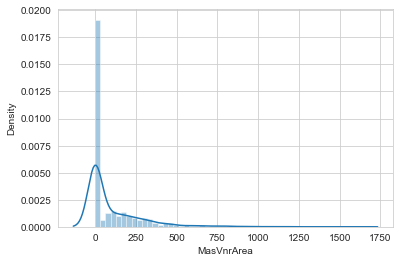

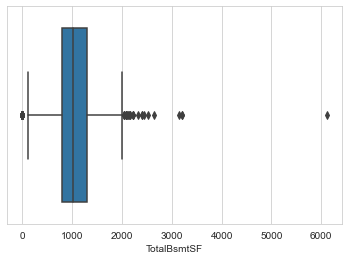

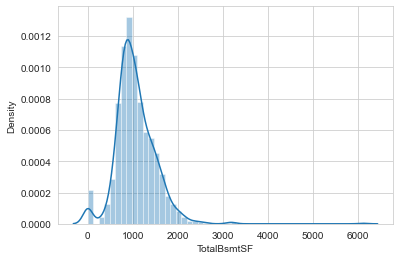

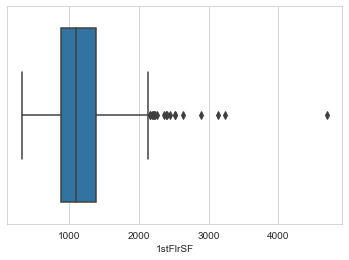

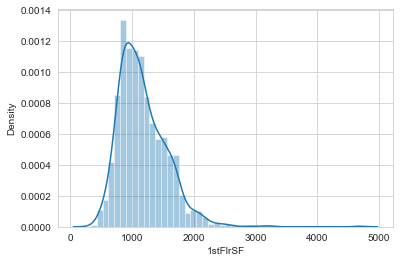

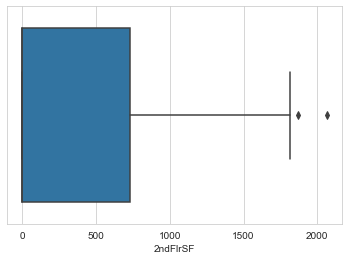

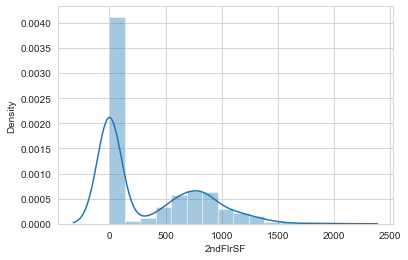

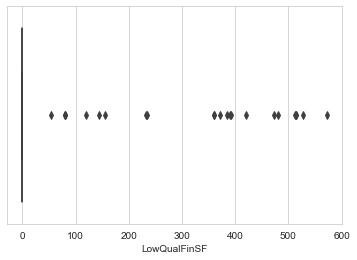

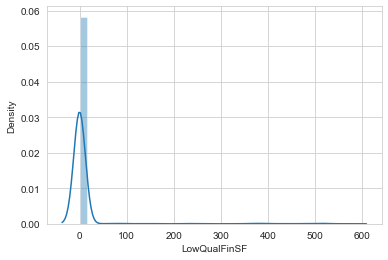

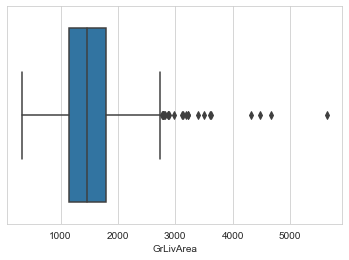

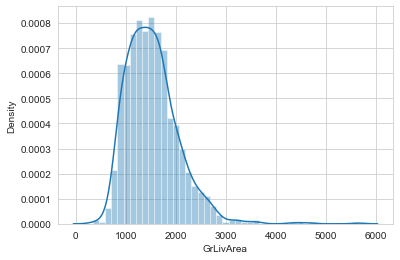

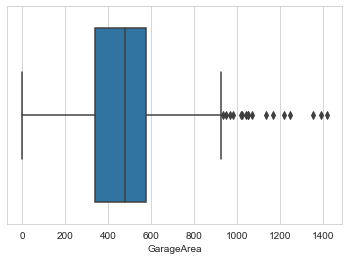

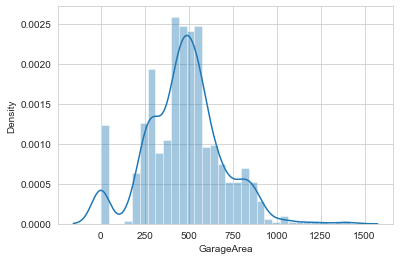

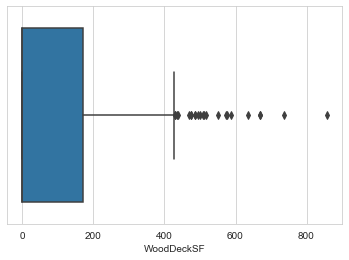

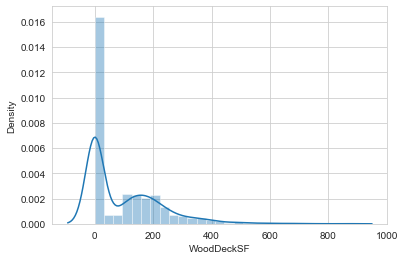

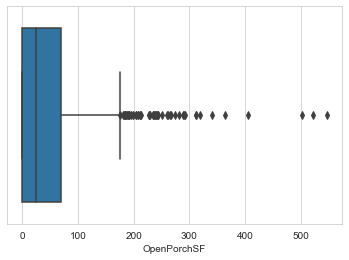

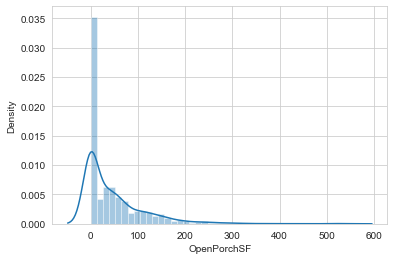

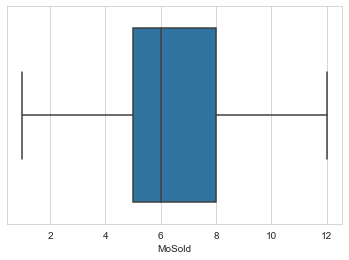

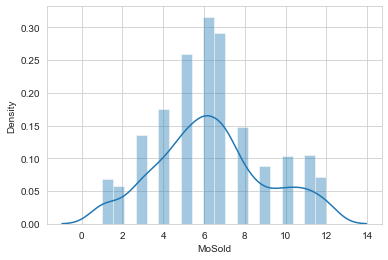

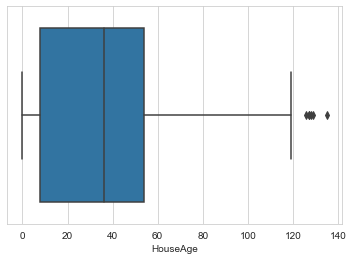

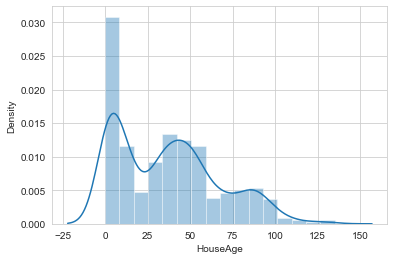

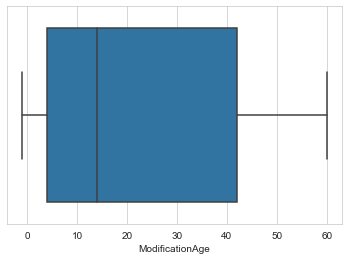

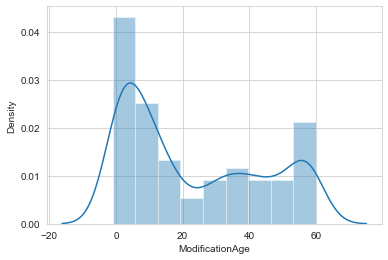

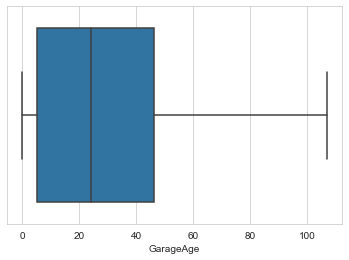

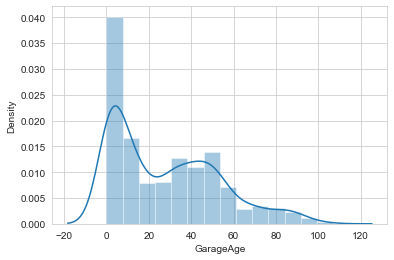

In [147]:
for i in outlier:
    sns.boxplot(df[i])
    plt.show()
    sns.distplot(df[i])
    plt.show()


In [149]:
df[outlier].skew()

LotFrontage         2.815783
LotArea            10.659285
MasVnrArea          2.835718
TotalBsmtSF         1.744591
1stFlrSF            1.513707
2ndFlrSF            0.823479
LowQualFinSF        8.666142
GrLivArea           1.449952
GarageArea          0.189665
WoodDeckSF          1.504929
OpenPorchSF         2.410840
MoSold              0.220979
HouseAge            0.573127
ModificationAge     0.495051
GarageAge           0.699249
dtype: float64

In [150]:
#Outliers handle by IQR
for i in outlier:
    IQR= df[i].quantile(.75)-df[i].quantile(.25)
    lower=df[i].quantile(.25) - (1.5 * IQR)
    upper=df[i].quantile(.75) + (1.5 * IQR)
    df[i]=np.where(df[i]<lower,lower,df[i])
    df[i]=np.where(df[i]>upper,upper,df[i])
df[outlier].skew()

LotFrontage        0.347416
LotArea            0.184194
MasVnrArea         1.294984
TotalBsmtSF        0.243671
1stFlrSF           0.663710
2ndFlrSF           0.808038
LowQualFinSF       0.000000
GrLivArea          0.587651
GarageArea        -0.107166
WoodDeckSF         1.060148
OpenPorchSF        1.154030
MoSold             0.220979
HouseAge           0.555132
ModificationAge    0.495051
GarageAge          0.699249
dtype: float64

In [151]:
df.head(5)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL         60.0   4928.0   Pave      IR1         Lvl   
1          20       RL         95.0  15865.0   Pave      IR1         Lvl   
2          60       RL         92.0   9920.0   Pave      IR1         Lvl   
3          20       RL        105.0  11751.0   Pave      IR1         Lvl   
4          20       RL         60.0  16635.0   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE     1Story   
1    Inside       Mod        NAmes       Norm       Norm     1Fam     1Story   
2   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam     2Story   
3    Inside       Gtl       NWAmes       Norm       Norm     1Fam     1Story   
4       FR2       Gtl       NWAmes       Norm       Norm     1Fam     1Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            6            5     Gable  CompShg     Plywood     Plywood   
1            8            6      Flat  Tar&Grv     Wd Sdng     Wd Sdng   
2            7            5     Gable  CompShg     MetalSd     MetalSd   
3            6            6       Hip  CompShg     Plywood     Plywood   
4            6            7     Gable  CompShg     CemntBd     CmentBd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       None         0.0        TA        TA     CBlock       Gd       TA   
1       None         0.0        Gd        Gd      PConc       TA       Gd   
2       None         0.0        Gd        TA      PConc       Gd       TA   
3    BrkFace       400.0        TA        TA     CBlock       Gd       TA   
4      Stone       126.0        Gd        TA     CBlock       Gd       TA   

  BsmtExposure BsmtFinType1 BsmtFinType2  TotalBsmtSF Heating HeatingQC  \
0           No          ALQ          Unf      1078.00    GasA        TA   
1           Gd          ALQ          Rec      2030.25    GasA        Ex   
2           Av          GLQ          Unf      1117.00    GasA        Ex   
3           No          BLQ          Unf      1844.00    GasA        Ex   
4           No          ALQ          Unf      1602.00    GasA        Gd   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr     958.0       0.0           0.0      958.0   
1          Y      SBrkr    2142.0       0.0           0.0     2217.0   
2          Y      SBrkr    1127.0     886.0           0.0     2013.0   
3          Y      SBrkr    1844.0       0.0           0.0     1844.0   
4          Y      SBrkr    1602.0       0.0           0.0     1602.0   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             1         2         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType GarageFinish  \
0          TA             5        Typ           1     Attchd          RFn   
1          Gd             8        Typ           1     Attchd          Unf   
2          TA             8        Typ           1     Attchd          Unf   
3          TA             7        Typ           1     Attchd          RFn   
4          Gd             8        Typ           1     Attchd          Fin   

   GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  \
0           2       440.0         TA         TA          Y         0.0   
1           2       621.0         TA         TA          Y        81.0   
2           2       455.0         TA         TA          Y       180.0   
3           2       5

In [152]:
df.shape

(1168, 70)

In [153]:
continuous= [x for x in df.columns if df[x].dtypes!='O']
categorical= [x for x in df.columns if df[x].dtypes=='O']

In [154]:
df[continuous].shape , df[categorical].shape

((1168, 33), (1168, 37))

In [155]:
# Continuous data has been handeled for outliers
df[continuous]

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0            120       60.000   4928.0            6            5         0.0   
1             20       95.000  15865.0            8            6         0.0   
2             60       92.000   9920.0            7            5         0.0   
3             20      105.000  11751.0            6            6       400.0   
4             20       60.000  16635.0            6            7       126.0   
5             60       58.000  14054.0            7            5         0.0   
6             20       60.000  11341.0            5            6       180.0   
7             20       88.000  13125.0            5            4        67.0   
8             20       70.000   9170.0            5            7         0.0   
9             50       80.000   8480.0            5            5         0.0   
10            50       50.000   8600.0            6            6         0.0   
11            60       44.000   9548.0            7            6       223.0   
12            20      108.125   9196.0            7            5         0.0   
13            20       80.000   8892.0            5            5        66.0   
14            50       59.000  16466.0            5            7         0.0   
15            70       55.000  10592.0            6            7         0.0   
16            30       60.000   5890.0            6            8         0.0   
17            20       64.000   7314.0            7            5        82.0   
18            20       60.000   7917.0            6            7       174.0   
19           160       31.125   2016.0            5            5       304.0   
20            60       80.000  12435.0            7            5       172.0   
21            85       70.000   8445.0            5            7         0.0   
22            20       68.000   9717.0            5            6         0.0   
23            20       60.000  10659.0            5            6         0.0   
24            20       71.000   9230.0            5            8       166.0   
25            20       60.000  17356.5            6            5       184.0   
26            30       60.000  17356.5            5            7         0.0   
27            20       88.000  11394.0            9            2       350.0   
28            45       58.000   6380.0            5            6         0.0   
29            70       74.000  11988.0            6            7         0.0   
30           120       61.000   7658.0            9            5       400.0   
31            60       60.000   3378.0            7            8         0.0   
32            90       60.000  17356.5            5            5         1.0   
33            50       60.000  12358.0            5            6         0.0   
34            60       60.000  14762.0            5            6         0.0   
35            20      108.125  10356.0            5            6         0.0   
36            20       80.000  10400.0            7            5       189.0   
37            20       84.000  12615.0            6            7         0.0   
38            85       60.000   7540.0            6            6         0.0   
39            40       50.000   9100.0            5            6         0.0   
40            20      108.125  17356.5            6            5       112.0   
41            20       70.000  13300.0            5            7         0.0   
42           160       31.125   3180.0            7            5         0.0   
43           160       31.125   2522.0            6            5        50.0   
44            80       65.000   8385.0            5            8       220.0   
45            20       76.000   8314.0            5            7         0.0   
46            60       60.000   8123.0            6            5        16.0   
47            20      100.000  12000.0            5            7         0.0   
48            20       50.000   5000.0            1            3         0.0   
49    

In [156]:
#Encoding
##of categorical features
df[categorical].head(5)

MSZoning Street LotShape LandContour LotConfig LandSlope Neighborhood  \
0       RL   Pave      IR1         Lvl    Inside       Gtl      NPkVill   
1       RL   Pave      IR1         Lvl    Inside       Mod        NAmes   
2       RL   Pave      IR1         Lvl   CulDSac       Gtl      NoRidge   
3       RL   Pave      IR1         Lvl    Inside       Gtl       NWAmes   
4       RL   Pave      IR1         Lvl       FR2       Gtl       NWAmes   

  Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st  \
0       Norm       Norm   TwnhsE     1Story     Gable  CompShg     Plywood   
1       Norm       Norm     1Fam     1Story      Flat  Tar&Grv     Wd Sdng   
2       Norm       Norm     1Fam     2Story     Gable  CompShg     MetalSd   
3       Norm       Norm     1Fam     1Story       Hip  CompShg     Plywood   
4       Norm       Norm     1Fam     1Story     Gable  CompShg     CemntBd   

  Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0     Plywood       None        TA        TA     CBlock       Gd       TA   
1     Wd Sdng       None        Gd        Gd      PConc       TA       Gd   
2     MetalSd       None        Gd        TA      PConc       Gd       TA   
3     Plywood    BrkFace        TA        TA     CBlock       Gd       TA   
4     CmentBd      Stone        Gd        TA     CBlock       Gd       TA   

  BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir  \
0           No          ALQ          Unf    GasA        TA          Y   
1           Gd          ALQ          Rec    GasA        Ex          Y   
2           Av          GLQ          Unf    GasA        Ex          Y   
3           No          BLQ          Unf    GasA        Ex          Y   
4           No          ALQ          Unf    GasA        Gd          Y   

  Electrical KitchenQual Functional GarageType GarageFinish GarageQual  \
0      SBrkr          TA        Typ     Attchd          RFn         TA   
1      SBrkr          Gd        Typ     Attchd          Unf         TA   
2      SBrkr          TA        Typ     Attchd          Unf         TA   
3      SBrkr          TA        Typ     Attchd          RFn         TA   
4      SBrkr          Gd        Typ     Attchd          Fin         TA   

  GarageCond PavedDrive SaleType SaleCondition  
0         TA          Y       WD        Normal  
1         TA          Y       WD        Normal  
2         TA          Y       WD        Normal  
3         TA          Y      COD        Normal  
4         TA          Y       WD        Normal

In [157]:
#Some of will be nominal and some will be ordinal in category, we have to encode accordingly

In [158]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print('*' * 50)

MSZoning
['RL' 'RM' 'FV' 'RH' 'C (all)']
**************************************************
Street
['Pave' 'Grvl']
**************************************************
LotShape
['IR1' 'Reg' 'IR2' 'IR3']
**************************************************
LandContour
['Lvl' 'Bnk' 'HLS' 'Low']
**************************************************
LotConfig
['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
**************************************************
LandSlope
['Gtl' 'Mod' 'Sev']
**************************************************
Neighborhood
['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDale' 'StoneBr' 'BrkSide'
 'NridgHt' 'OldTown' 'Somerst' 'Timber' 'SWISU' 'SawyerW' 'ClearCr'
 'Veenker' 'Blmngtn' 'MeadowV' 'Blueste']
**************************************************
Condition1
['Norm' 'Feedr' 'RRAn' 'PosA' 'RRAe' 'Artery' 'PosN' 'RRNe' 'RRNn']
**************************************************
Condition2
['Norm' 'RRAe' 'Feedr' '

In [159]:
ordinal_cols = {
    'ExterQual':{'Ex':5,'Gd':4,'TA':3,'Fa':2},
    'ExterCond':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
    'BsmtQual': {'Ex':5,'Gd':4,'TA':3,'Fa':2},
    'BsmtCond' : {'Gd':4,'TA':3,'Fa':2,'Po':1},
    'BsmtExposure' : {'Gd':5,'Av':4,'Mn':3,'No':2,'NA':1},
    'BsmtFinType1' : {'GLQ':7,'ALQ':6,'BLQ':5,'Rec':4,'LwQ':3,'Unf':2,'NA':1},
    'BsmtFinType2' : {'GLQ':7,'ALQ':6,'BLQ':5,'Rec':4,'LwQ':3,'Unf':2,'NA':1},
    'HeatingQC' :{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1  },
    'KitchenQual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1 },
    'GarageQual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1 },
    'GarageCond':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1 },
    'GarageFinish' : {'Fin':3,'RFn':2,'Unf':1},
    
      
    
    
    'Utilities' : {'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1}
}
df.replace(ordinal_cols, inplace = True)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL         60.0   4928.0   Pave      IR1         Lvl   
1          20       RL         95.0  15865.0   Pave      IR1         Lvl   
2          60       RL         92.0   9920.0   Pave      IR1         Lvl   
3          20       RL        105.0  11751.0   Pave      IR1         Lvl   
4          20       RL         60.0  16635.0   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE     1Story   
1    Inside       Mod        NAmes       Norm       Norm     1Fam     1Story   
2   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam     2Story   
3    Inside       Gtl       NWAmes       Norm       Norm     1Fam     1Story   
4       FR2       Gtl       NWAmes       Norm       Norm     1Fam     1Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            6            5     Gable  CompShg     Plywood     Plywood   
1            8            6      Flat  Tar&Grv     Wd Sdng     Wd Sdng   
2            7            5     Gable  CompShg     MetalSd     MetalSd   
3            6            6       Hip  CompShg     Plywood     Plywood   
4            6            7     Gable  CompShg     CemntBd     CmentBd   

  MasVnrType  MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  \
0       None         0.0          3          3     CBlock         4         3   
1       None         0.0          4          4      PConc         3         4   
2       None         0.0          4          3      PConc         4         3   
3    BrkFace       400.0          3          3     CBlock         4         3   
4      Stone       126.0          4          3     CBlock         4         3   

   BsmtExposure  BsmtFinType1  BsmtFinType2  TotalBsmtSF Heating  HeatingQC  \
0             2             6             2      1078.00    GasA          3   
1             5             6             4      2030.25    GasA          5   
2             4             7             2      1117.00    GasA          5   
3             2             5             2      1844.00    GasA          5   
4             2             6             2      1602.00    GasA          4   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr     958.0       0.0           0.0      958.0   
1          Y      SBrkr    2142.0       0.0           0.0     2217.0   
2          Y      SBrkr    1127.0     886.0           0.0     2013.0   
3          Y      SBrkr    1844.0       0.0           0.0     1844.0   
4          Y      SBrkr    1602.0       0.0           0.0     1602.0   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             1         2         0             3             1   

   KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageFinish  \
0            3             5        Typ           1     Attchd             2   
1            4             8        Typ           1     Attchd             1   
2            3             8        Typ           1     Attchd             1   
3            3             7        Typ           1     Attchd             2   
4            4             8        Typ           1     Attchd             3   

   GarageCars  GarageArea  GarageQual  GarageCond PavedDrive  WoodDeckSF  \
0           2       440.0           3           3          Y         0.0   
1           2       621.0           3           3          Y        81.0   
2           2       455.0    

In [160]:
df.shape

(1168, 70)

In [161]:
encoded=pd.get_dummies(df)
encoded.shape

(1168, 220)

In [162]:
[x for x in encoded.columns if encoded[x].dtypes=='O']

[]

In [163]:
# Seprate input and output features

x= encoded.drop('SalePrice', axis=1)
y=encoded['SalePrice']
x.shape, y.shape

((1168, 219), (1168,))

In [164]:
x.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0         120         60.0   4928.0            6            5         0.0   
1          20         95.0  15865.0            8            6         0.0   
2          60         92.0   9920.0            7            5         0.0   
3          20        105.0  11751.0            6            6       400.0   
4          20         60.0  16635.0            6            7       126.0   

   ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          3          3         4         3             2             6   
1          4          4         3         4             5             6   
2          4          3         4         3             4             7   
3          3          3         4         3             2             5   
4          4          3         4         3             2             6   

   BsmtFinType2  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0             2      1078.00          3     958.0       0.0           0.0   
1             4      2030.25          5    2142.0       0.0           0.0   
2             2      1117.00          5    1127.0     886.0           0.0   
3             2      1844.00          5    1844.0       0.0           0.0   
4             2      1602.00          4    1602.0       0.0           0.0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0      958.0             0             0         2         0             2   
1     2217.0             1             0         2         0             4   
2     2013.0             1             0         2         1             3   
3     1844.0             0             0         2         0             3   
4     1602.0             0             1         2         0             3   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  GarageFinish  \
0             1            3             5           1             2   
1             1            4             8           1             1   
2             1            3             8           1             1   
3             1            3             7           1             2   
4             1            4             8           1             3   

   GarageCars  GarageArea  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  \
0           2       440.0           3           3         0.0        175.0   
1           2       621.0           3           3        81.0        175.0   
2           2       455.0           3           3       180.0        130.0   
3           2       546.0           3           3         0.0        122.0   
4           2       529.0           3           3       240.0          0.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  HouseAge  \
0              0          0            0         0        0     2.0      31.0   
1              0          0          224         0        0    10.0      37.0   
2              0          0            0         0        0     6.0      11.0   
3              0          0            0         0        0     1.0      33.0   
4              0          0            0         0        0     6.0      32.0   

   ModificationAge  GarageAge  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  \
0             31.0       30.0                 0            0            0   
1             37.0       37.0                 0            0            0   
2             10.0       10.0                 0            0            0   
3             33.0       33.0                 0            0            0   
4              9.0       32.0                 0            0            0   

   MSZoning_RL  MSZoning_RM  Street_Grvl  Street_Pave  LotShape_IR1  \
0            1            0            0            1             1   
1            1            0            0            1             1   
2            1            0            0            1             1   
3            1       

In [165]:
y.head()

0    128000
1    268000
2    269790
3    190000
4    215000
Name: SalePrice, dtype: int64

In [166]:
##Feature Selection

In [167]:
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(x,y)
mutual_info=pd.Series(mutual_info)
mutual_info.index= x.columns
(mutual_info.sort_values(ascending=False)!=0).count()

219

In [168]:
pd.DataFrame(mutual_info).value_counts(ascending=False)

0.000000    52
0.039861     1
0.032581     1
0.035364     1
0.037411     1
0.038408     1
0.039018     1
0.039311     1
0.039655     1
0.039813     1
0.040246     1
0.000164     1
0.045249     1
0.047384     1
0.048200     1
0.049021     1
0.051235     1
0.055543     1
0.057880     1
0.060947     1
0.031380     1
0.030855     1
0.029777     1
0.028567     1
0.021208     1
0.021681     1
0.021956     1
0.022482     1
0.022529     1
0.023006     1
0.023130     1
0.023295     1
0.024438     1
0.024599     1
0.025594     1
0.025880     1
0.026381     1
0.026643     1
0.026793     1
0.027470     1
0.028281     1
0.061611     1
0.063688     1
0.064034     1
0.163926     1
0.180081     1
0.199597     1
0.205920     1
0.208724     1
0.252556     1
0.256276     1
0.261556     1
0.270497     1
0.282928     1
0.318987     1
0.324421     1
0.328298     1
0.339151     1
0.348015     1
0.354412     1
0.364808     1
0.452884     1
0.174169     1
0.158031     1
0.065510     1
0.155575     1
0.065683  

<AxesSubplot:>

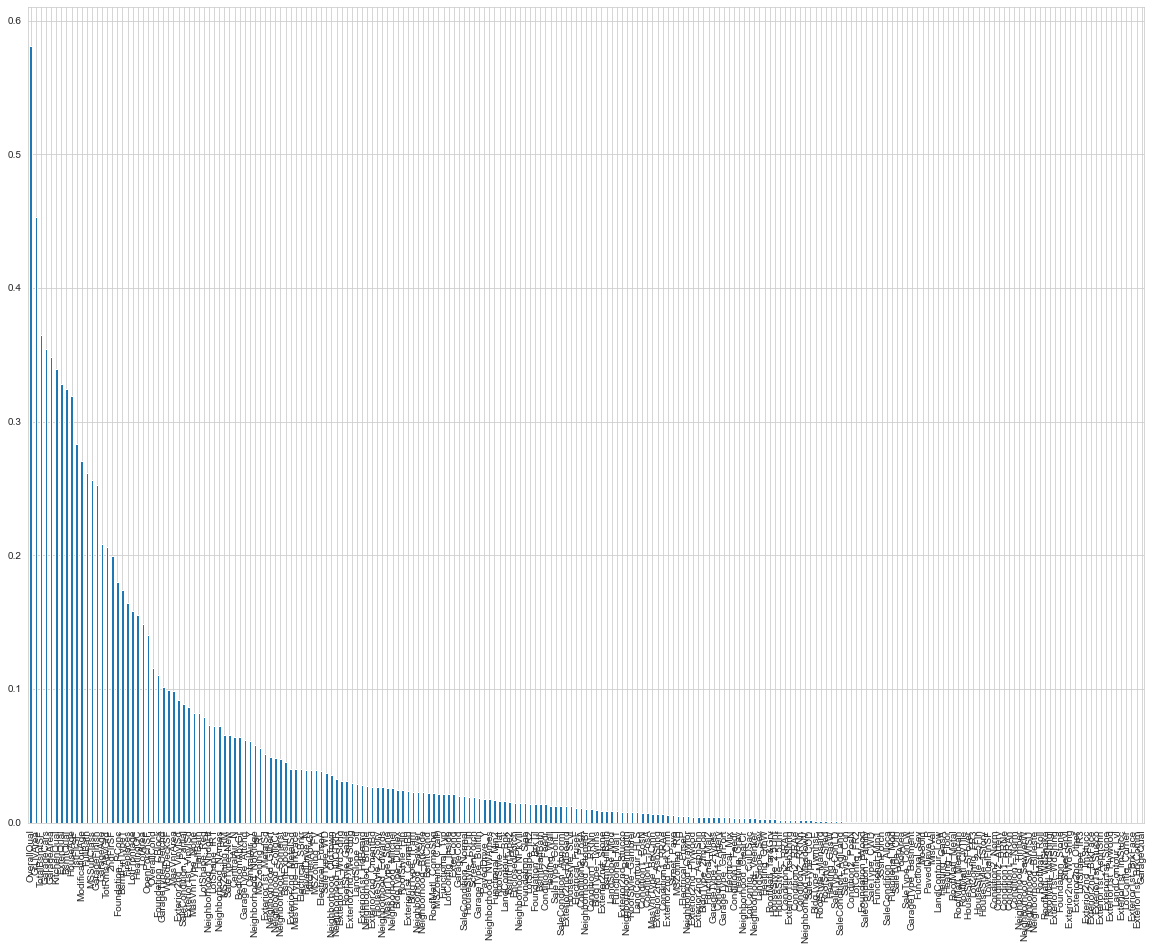

In [169]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,15))

In [172]:
from sklearn.feature_selection import SelectPercentile
selected=SelectPercentile(mutual_info_regression,percentile=76)
selected.fit(x,y)


SelectPercentile(percentile=76,
                 score_func=<function mutual_info_regression at 0x000002A8FC53F8B0>)

In [173]:
selected.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
        True, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True, False, False,  True,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [174]:
selectedfeatures=x.columns[selected.get_support()]
len(selectedfeatures)

166

In [175]:
# Here , we have selected only the features have some dependency on target feature.
inputdata=x[selectedfeatures]
inputdata.shape

(1168, 166)

In [176]:
inputdata.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0         120         60.0   4928.0            6            5         0.0   
1          20         95.0  15865.0            8            6         0.0   
2          60         92.0   9920.0            7            5         0.0   
3          20        105.0  11751.0            6            6       400.0   
4          20         60.0  16635.0            6            7       126.0   

   ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          3          3         4         3             2             6   
1          4          4         3         4             5             6   
2          4          3         4         3             4             7   
3          3          3         4         3             2             5   
4          4          3         4         3             2             6   

   BsmtFinType2  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0             2      1078.00          3     958.0       0.0           0.0   
1             4      2030.25          5    2142.0       0.0           0.0   
2             2      1117.00          5    1127.0     886.0           0.0   
3             2      1844.00          5    1844.0       0.0           0.0   
4             2      1602.00          4    1602.0       0.0           0.0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0      958.0             0             0         2         0             2   
1     2217.0             1             0         2         0             4   
2     2013.0             1             0         2         1             3   
3     1844.0             0             0         2         0             3   
4     1602.0             0             1         2         0             3   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  GarageFinish  \
0             1            3             5           1             2   
1             1            4             8           1             1   
2             1            3             8           1             1   
3             1            3             7           1             2   
4             1            4             8           1             3   

   GarageCars  GarageArea  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  \
0           2       440.0           3           3         0.0        175.0   
1           2       621.0           3           3        81.0        175.0   
2           2       455.0           3           3       180.0        130.0   
3           2       546.0           3           3         0.0        122.0   
4           2       529.0           3           3       240.0          0.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  HouseAge  \
0              0          0            0         0        0     2.0      31.0   
1              0          0          224         0        0    10.0      37.0   
2              0          0            0         0        0     6.0      11.0   
3              0          0            0         0        0     1.0      33.0   
4              0          0            0         0        0     6.0      32.0   

   ModificationAge  GarageAge  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  \
0             31.0       30.0                 0            0            0   
1             37.0       37.0                 0            0            0   
2             10.0       10.0                 0            0            0   
3             33.0       33.0                 0            0            0   
4              9.0       32.0                 0            0            0   

   MSZoning_RL  MSZoning_RM  Street_Grvl  LotShape_IR1  LotShape_IR2  \
0            1            0            0             1             0   
1            1            0            0             1             0   
2            1            0            0             1             0   
3            1   

In [177]:
#Lets remove skewness of some categorical features:
skew_feature=['LotFrontage','LotArea','TotalBsmtSF','1stFlrSF','GrLivArea']
for feature in skew_feature:
    inputdata[feature]= np.log(inputdata[feature])
inputdata.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
0         120     4.094345  8.502689            6            5         0.0   
1          20     4.553877  9.671871            8            6         0.0   
2          60     4.521789  9.202308            7            5         0.0   
3          20     4.653960  9.371694            6            6       400.0   
4          20     4.094345  9.719264            6            7       126.0   

   ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          3          3         4         3             2             6   
1          4          4         3         4             5             6   
2          4          3         4         3             4             7   
3          3          3         4         3             2             5   
4          4          3         4         3             2             6   

   BsmtFinType2  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0             2     6.982863          3  6.864848       0.0           0.0   
1             4     7.615914          5  7.669495       0.0           0.0   
2             2     7.018402          5  7.027315     886.0           0.0   
3             2     7.519692          5  7.519692       0.0           0.0   
4             2     7.379008          4  7.379008       0.0           0.0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   6.864848             0             0         2         0             2   
1   7.703910             1             0         2         0             4   
2   7.607381             1             0         2         1             3   
3   7.519692             0             0         2         0             3   
4   7.379008             0             1         2         0             3   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  GarageFinish  \
0             1            3             5           1             2   
1             1            4             8           1             1   
2             1            3             8           1             1   
3             1            3             7           1             2   
4             1            4             8           1             3   

   GarageCars  GarageArea  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  \
0           2       440.0           3           3         0.0        175.0   
1           2       621.0           3           3        81.0        175.0   
2           2       455.0           3           3       180.0        130.0   
3           2       546.0           3           3         0.0        122.0   
4           2       529.0           3           3       240.0          0.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  HouseAge  \
0              0          0            0         0        0     2.0      31.0   
1              0          0          224         0        0    10.0      37.0   
2              0          0            0         0        0     6.0      11.0   
3              0          0            0         0        0     1.0      33.0   
4              0          0            0         0        0     6.0      32.0   

   ModificationAge  GarageAge  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  \
0             31.0       30.0                 0            0            0   
1             37.0       37.0                 0            0            0   
2             10.0       10.0                 0            0            0   
3             33.0       33.0                 0            0            0   
4              9.0       32.0                 0            0            0   

   MSZoning_RL  MSZoning_RM  Street_Grvl  LotShape_IR1  LotShape_IR2  \
0            1            0            0             1             0   
1            1            0            0             1             0   
2            1            0            0             1             0   
3          

In [179]:
#Standardization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(inputdata)
X.shape
(1168, 166)
X.shape , y.shape

((1168, 166), (1168,))

In [180]:
#Machine Learning
# Its a Regression problem coz output variable have continuous data, sales prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

LR= LinearRegression()
# FInd best Random_state

maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,y,random_state=i,test_size=.20)
    LR= LinearRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.8663000179852971 on Random State = 21


In [181]:
# Lets select Random State 135
x_train,x_test,y_train,y_test= train_test_split(X,y,random_state=135,test_size=.3)
LR.fit(x_train,y_train)

LinearRegression()

In [182]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [183]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
XGB_model= XGBRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [184]:
for m in model:
    m.fit(x_train,y_train)
    print('mean_absolute_error of ',m ,'model', mean_absolute_error(y_test,m.predict(x_test)))
    print('mean_square_error of',m,'model' , mean_squared_error(y_test,m.predict(x_test)))
    print('R2 Score of',m,'model', r2_score(y_test,m.predict(x_test) )*100)
    print('X' * 50, '\n\n')

mean_absolute_error of  LinearRegression() model 47923549254.92023
mean_square_error of LinearRegression() model 7.685235708602133e+23
R2 Score of LinearRegression() model -1.083905579752525e+16
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Ridge() model 19713.744612907598
mean_square_error of Ridge() model 825054216.9043807
R2 Score of Ridge() model 88.36365072967062
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Lasso() model 21638.187217566043
mean_square_error of Lasso() model 1200959049.283253
R2 Score of Lasso() model 83.06198711491194
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  DecisionTreeRegressor() model 29682.809116809116
mean_square_error of DecisionTreeRegressor() model 2118818468.8831909
R2 Score of DecisionTreeRegressor() model 70.11673749531695
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  SVR() model 61140.57142369511
mean_square_error of SVR

In [186]:
#Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
for i in model:
    print('Root mean_square of ',i, 'model',np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
    score=cross_val_score(i,X,y,cv=10, scoring='neg_mean_squared_error').mean()
    print("cross Validation score of root mean square ",i ," is ",np.sqrt(-score))
    print('*'*50)

Root mean_square of  LinearRegression() model 876654761499.767
cross Validation score of root mean square  LinearRegression()  is  279070721192326.28
**************************************************
Root mean_square of  Ridge() model 28723.757012347472
cross Validation score of root mean square  Ridge()  is  32250.15890176567
**************************************************
Root mean_square of  Lasso() model 34654.85607073348
cross Validation score of root mean square  Lasso()  is  35983.6043853314
**************************************************
Root mean_square of  DecisionTreeRegressor() model 46030.62533665159
cross Validation score of root mean square  DecisionTreeRegressor()  is  43198.59713319543
**************************************************
Root mean_square of  SVR() model 85912.7132839058
cross Validation score of root mean square  SVR()  is  81099.63619627565
**************************************************
Root mean_square of  KNeighborsRegressor() model 43620.0

In [188]:
#Hypertuning of XGBRegressor
from sklearn.model_selection import GridSearchCV
params= {"learning_rate"    : [0.01,.05,.1,.2,.3,.5 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8],1
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.01, 0.05,0.1, 0.2 , 0.3],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }
GCV= GridSearchCV(XGB_model,params,cv=5,scoring='neg_mean_squared_error', n_jobs=-1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat...
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'gamma': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
                         'max_depth': [3, 4, 5, 6, 8],
                         'min_child_weight': [1, 3, 5, 7]},
             scoring='neg_mean_squared_error')

In [189]:
GCV.best_params_
GCV_pred=GCV.best_estimator_.predict(x_test)
np.sqrt(mean_squared_error(y_test,GCV_pred))

22432.62807697497

In [191]:
#Saving model in pickle format
import joblib
joblib.dump(GCV.best_estimator_,"house_price_prediction.pkl")

['house_price_prediction.pkl']